# Project: Investigating Covid 19 data. 

## Table of Contents
<ul>
<li><a href="#intro">1- Introduction</a></li>
<li><a href="#datasource">2- Data and Data Sources</a></li>
<li><a href="#wrangling">3- Data Wrangling</a></li>
<li><a href="#explore">4- Data Exploration</a></li>
         <ul>
            <li><a href="#uni">4.1 Univariate Exploration</a></li>
           <li><a href="#bi">4.2 Univariate Exploration</a>
            <li><a href="#multi">4.3 Multivariate Exploration</a></li>
            <li><a href="#research">4.4 Research Questions</a></li>
        </ul>
    
<li><a href="#eda">5 -Exploratory Data Analysis</a></li>
        <ul>
            <li><a href="#research1">5.1 Behavior of Covid 19</a></li>
           <li><a href="#research2">5.2How Can we rely on these data to make comparisons and extract conclusions?</a>
            <li><a href="#research3">5.3 What is the effect of Population density on daily cases?</a></li>
            <li><a href="#research4">5.4 What is the effect of median age on daily cases?</a></li>
            <li><a href="#research5">5.5 What is the effect of Income Level on daily cases?</a></li>
            <li><a href="#research6">5.6 What is the effect of Continent on daily cases?</a></li>
            <li><a href="#research7">5.7 What is the effect of Vaccinations on daily cases?</a></li>
        </ul>

<li><a href="#conclusions">6- Conclusions</a></li>
<li><a href="#recomend">7- Recommmenations</a></li>
</ul>

<a id='intro'></a>
# Introduction

Covid 19 pandemic has changed the world dramatically and there are a lot of unanswered questions about it. In this notebook,we will try to discover more about it using data informed strategy. Any observation - even small ones - if it is accurately interpreted,It will give us a great weapon in our war with the virus.

<a id='datasource'></a>

# Data and Data Sources<br/>


### **1-** **Timeseres data:** 

Four Datasets contains time series data of global confirmed, recovered, deaths and vaccinations cases for all the countries in the world till 17-6-2021.

**Source:** Johns Hopkins Coronavirus Resource Center <a href='https://coronavirus.jhu.edu/about/how-to-use-our-data'>here.</a> 




### <br>**2-** **Demographic data:** consists of merging two datasets including:
1- Country
<br>2- Population
<br>3- Population density (people/Km2)
<br>4- Total tests coducted by each country till 17-6-2021
<br>5- Continent
<br>6- Income level
<br>7- Median age of each country.

**Note:**
Combination of data needed work with spreadsheet, manual entry and modification of data so it will be provided after pereperation.
 
**Sources:** 

A) The United Nations Statistics Division <a href='https://unstats.un.org/unsd/demographic-social/products/dyb/index.cshtml#censusdatasets'>here.</a> 

B) Worldometers <a href="https://www.worldometers.info/coronavirus/">here.</a> <br>

<a id='wrangling'></a>

# 3- Data Wrangling

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading data
confirmed_df = pd.read_csv("time_series_covid19_confirmed_global.csv")
recovered_df = pd.read_csv("time_series_covid19_recovered_global.csv")
deaths_df = pd.read_csv("time_series_covid19_deaths_global.csv")
vaccination_df = pd.read_csv("time_series_covid19_vaccine_global.csv")
Demographic_df = pd.read_csv("population_income_level_data.csv")

# Assessing

### 1- Timeseries dataframes

In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,6/8/2021,6/9/2021,6/10/2021,6/11/2021,6/12/2021,6/13/2021,6/14/2021,6/15/2021,6/16/2021,6/17/2021
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289


In [4]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,6/8/2021,6/9/2021,6/10/2021,6/11/2021,6/12/2021,6/13/2021,6/14/2021,6/15/2021,6/16/2021,6/17/2021
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,59569,59871,60280,60598,60939,61410,61706,61820,62397,62698
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,129736,129761,129785,129807,129826,129842,129865,129879,129888,129895
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,91651,91894,92132,92384,92620,92852,93094,93355,93586,93831
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13557,13569,13578,13591,13591,13591,13618,13626,13633,13640
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,29368,29553,29960,30101,30207,30282,30359,30775,31003,31105


In [5]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,6/8/2021,6/9/2021,6/10/2021,6/11/2021,6/12/2021,6/13/2021,6/14/2021,6/15/2021,6/16/2021,6/17/2021
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,3251,3305,3356,3412,3449,3527,3612,3683,3683,3842
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2452,2452,2452,2453,2453,2453,2453,2454,2454,2454
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3537,3544,3552,3560,3565,3571,3579,3588,3598,3605
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,803,811,815,819,825,831,836,842,847,851


In [6]:
vaccination_df.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
0,Afghanistan,2/22/2021,0,0.0,0.0,2/22/2021,4.0,NaN
1,Afghanistan,2/23/2021,0,0.0,0.0,2/23/2021,4.0,NaN
2,Afghanistan,2/24/2021,0,0.0,0.0,2/24/2021,4.0,NaN
3,Afghanistan,2/25/2021,0,0.0,0.0,2/25/2021,4.0,NaN
4,Afghanistan,2/26/2021,0,0.0,0.0,2/26/2021,4.0,NaN


In [7]:
# Check for null values
for df in [confirmed_df,recovered_df,deaths_df,vaccination_df]:
    print(df.isnull().sum().sort_values(ascending = False),"\n\n")

Province/State    191
Lat                 2
Long                2
12/31/2020          0
12/25/2020          0
                 ... 
7/4/2020            0
7/3/2020            0
7/2/2020            0
7/1/2020            0
6/17/2021           0
Length: 517, dtype: int64 


Province/State    192
Lat                 1
Long                1
12/31/2020          0
12/25/2020          0
                 ... 
7/4/2020            0
7/3/2020            0
7/2/2020            0
7/1/2020            0
6/17/2021           0
Length: 517, dtype: int64 


Province/State    191
Lat                 2
Long                2
12/31/2020          0
12/25/2020          0
                 ... 
7/4/2020            0
7/3/2020            0
7/2/2020            0
7/1/2020            0
6/17/2021           0
Length: 517, dtype: int64 


Province_State                 20174
People_partially_vaccinated     6581
People_fully_vaccinated         6581
UID                              236
Country_Region                     0
Da

In [8]:
# Check for duplicates
for df in [confirmed_df,recovered_df,deaths_df,vaccination_df]:
    print(df.duplicated().sum())

0
0
0
0


In [9]:
#check a country with Province/State
confirmed_df[confirmed_df["Country/Region"] == "China"]

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,6/8/2021,6/9/2021,6/10/2021,6/11/2021,6/12/2021,6/13/2021,6/14/2021,6/15/2021,6/16/2021,6/17/2021
58,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004
59,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,1067,1067,1068,1069,1069,1070,1071,1071,1072,1072
60,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,598,598,598,598,598,598,598,598,598,598
61,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,632,632,635,636,637,637,638,638,641,646
62,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,194,194,194,194,194,194,194,194,194,194
63,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,2573,2582,2593,2605,2618,2625,2635,2650,2657,2666
64,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,275,275,275,275,275,275,275,275,275,275
65,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,147,147,147,147,147,147,147,147,147,147
66,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,188,188,188,188,188,188,188,188,188,188
67,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317


# Observations
1- The first 3 dataframes has the same structure but with untidy format.</br>

2- Some countries has only (Province/State) daily records not cummulative for the whole country</br>

3- Null values in Province/State columns is related to countries records for the whole country.</br>

4- There are Null values in vaccination_df.</br>

## Clean

## Solve untideness problems
* #### CODE

In [10]:
#Create a function to deal with the first 3 dataframes as they have the same structure.
#clean confirmed_df,recovered_df,deaths_df.
def clean(df,name):
    '''
    df : name of the dataframe you want to clean
    name : whether cumulative_confirmed , cumulative_recovered or cumulative_deaths
    
    '''
    #sum all provinces to get the whole country records for each day
    df = df.groupby("Country/Region", as_index=0).sum()
    
    #drop Lat,Long as we will not use them
    df.drop(["Lat","Long"],axis = 1 , inplace= True)
    
    #transpose the dataframe to get all dates in one columns (solve untideness)
    df = df.transpose().reset_index()
    
    #set Country/Region row as our columns then drop it from dataframe
    df.columns = df.iloc[0] 
    df = df.drop(0)
    
    #rename "Country/Region" to date to be the name of dates column
    df = df.rename(columns={"Country/Region":"date"})
    
    #melt our dataframe to solve untideness of country
    columns = list(df.columns)
    df = df.melt(id_vars= "date",value_vars=columns[1:],value_name= name,var_name="country")
    return df

In [11]:
clean_confirmed_df = clean(confirmed_df,"cumulative_confirmed")
clean_recovered_df = clean(recovered_df,"cumulative_recovered")
clean_deaths_df = clean(deaths_df,"cumulative_deaths")

* ### Check

In [12]:
clean_confirmed_df.head()

,date,country,cumulative_confirmed
0,1/22/2020,Afghanistan,0
1,1/23/2020,Afghanistan,0
2,1/24/2020,Afghanistan,0
3,1/25/2020,Afghanistan,0
4,1/26/2020,Afghanistan,0


In [13]:
clean_recovered_df.head()

,date,country,cumulative_recovered
0,1/22/2020,Afghanistan,0
1,1/23/2020,Afghanistan,0
2,1/24/2020,Afghanistan,0
3,1/25/2020,Afghanistan,0
4,1/26/2020,Afghanistan,0


In [14]:
clean_deaths_df.head()

,date,country,cumulative_deaths
0,1/22/2020,Afghanistan,0
1,1/23/2020,Afghanistan,0
2,1/24/2020,Afghanistan,0
3,1/25/2020,Afghanistan,0
4,1/26/2020,Afghanistan,0


In [15]:
for df in [clean_confirmed_df,clean_recovered_df,clean_deaths_df]:
    print(df.isnull().sum().sort_values(ascending = False),"\n\n")

date                    0
country                 0
cumulative_confirmed    0
dtype: int64 


date                    0
country                 0
cumulative_recovered    0
dtype: int64 


date                 0
country              0
cumulative_deaths    0
dtype: int64 




* ## Merge the 3 dataframes

* #### CODE

In [16]:
# merge the 3 dataframes
merged_df = pd.merge(clean_confirmed_df,clean_recovered_df,on = ["date","country"])
clean_df = pd.merge(merged_df,clean_deaths_df,on = ["date","country"])
clean_df.head()

,date,country,cumulative_confirmed,cumulative_recovered,cumulative_deaths
0,1/22/2020,Afghanistan,0,0,0
1,1/23/2020,Afghanistan,0,0,0
2,1/24/2020,Afghanistan,0,0,0
3,1/25/2020,Afghanistan,0,0,0
4,1/26/2020,Afghanistan,0,0,0


* #### Check

In [17]:
print("Null values:\n",clean_df.isnull().sum().sort_values(ascending = False),"\n")
print("\nDuplicates: ", clean_df.duplicated().sum())

Null values:
 date                    0
country                 0
cumulative_confirmed    0
cumulative_recovered    0
cumulative_deaths       0
dtype: int64 


Duplicates:  0


##  Vaccination dataframe

In [18]:
vaccination_df.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
0,Afghanistan,2/22/2021,0,0.0,0.0,2/22/2021,4.0,NaN
1,Afghanistan,2/23/2021,0,0.0,0.0,2/23/2021,4.0,NaN
2,Afghanistan,2/24/2021,0,0.0,0.0,2/24/2021,4.0,NaN
3,Afghanistan,2/25/2021,0,0.0,0.0,2/25/2021,4.0,NaN
4,Afghanistan,2/26/2021,0,0.0,0.0,2/26/2021,4.0,NaN


## Solve untideness problems
* #### CODE

In [19]:
#sum all provinces to get the whole country records for each day.
vaccination_df = vaccination_df.groupby(["Country_Region","Date"],as_index=0).sum()

#keep only data that we will use.
vaccination_df = vaccination_df.drop(["Doses_admin","UID"],axis = 1)

#rename columns to match that of clean_df
vaccination_df = vaccination_df.rename({"Date":"date","Country_Region":"country",
                       "People_partially_vaccinated":"partially_vaccinated",
                      "People_fully_vaccinated":"fully_vaccinated"},axis = 1)

* #### Check 

In [20]:
print("Null values:\n",vaccination_df.isnull().sum().sort_values(ascending = False))
vaccination_df

Null values:
 country                 0
date                    0
partially_vaccinated    0
fully_vaccinated        0
dtype: int64


,country,date,partially_vaccinated,fully_vaccinated
0,Afghanistan,2/22/2021,0.0,0.0
1,Afghanistan,2/23/2021,0.0,0.0
2,Afghanistan,2/24/2021,0.0,0.0
3,Afghanistan,2/25/2021,0.0,0.0
4,Afghanistan,2/26/2021,0.0,0.0
...,...,...,...,...
20169,Zimbabwe,6/5/2021,684164.0,364340.0
20170,Zimbabwe,6/6/2021,686636.0,375315.0
20171,Zimbabwe,6/7/2021,686636.0,375315.0
20172,Zimbabwe,6/8/2021,688696.0,385275.0


### Merge with clean_df

In [21]:
# Merge with yhe clean dataframe
clean_df = clean_df.merge(vaccination_df,on = ["country","date"],how = "left")
clean_df = clean_df.fillna(0) 
# null happens when date is before 2/22/2021 (first date in vaccination_df) 
#so replace with 0 as this means vaccination hasn't started yet
print("Null values:\n",clean_df.isnull().sum().sort_values(ascending = False))
print("\nDuplicates: ", clean_df.duplicated().sum())
clean_df

Null values:
 date                    0
country                 0
cumulative_confirmed    0
cumulative_recovered    0
cumulative_deaths       0
partially_vaccinated    0
fully_vaccinated        0
dtype: int64

Duplicates:  0


,date,country,cumulative_confirmed,cumulative_recovered,cumulative_deaths,partially_vaccinated,fully_vaccinated
0,1/22/2020,Afghanistan,0,0,0,0.0,0.0
1,1/23/2020,Afghanistan,0,0,0,0.0,0.0
2,1/24/2020,Afghanistan,0,0,0,0.0,0.0
3,1/25/2020,Afghanistan,0,0,0,0.0,0.0
4,1/26/2020,Afghanistan,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...
99517,6/13/2021,Zimbabwe,39959,37004,1632,693147.0,413911.0
99518,6/14/2021,Zimbabwe,40077,37027,1635,693568.0,414635.0
99519,6/15/2021,Zimbabwe,40318,37056,1637,693568.0,414635.0
99520,6/16/2021,Zimbabwe,40556,37075,1640,693568.0,414635.0


##  Demographic dataframe Assessing

In [22]:
Demographic_df

,country,population,pop_density,total_tests,continent,income_level,median_age
0,Afghanistan,39770634,59.627,552538,Asia,Low income,18.438
1,Albania,2874759,105.029,772270,Europe,Upper middle income,36.399
2,Algeria,44612800,18.411,230861,Africa,Lower middle income,28.521
3,Andorra,77384,164.394,193595,Europe,High income,46.200
4,Angola,33845950,26.363,608453,Africa,Lower middle income,16.677
...,...,...,...,...,...,...,...
189,Vietnam,98183253,291.000,6282417,Asia,Lower middle income,30.500
190,West Bank and Gaza,4817000,654.000,37529,Asia,Lower middle income,19.100
191,Yemen,30457162,56.492,92052,Asia,Lower middle income,20.221
192,Zambia,18877782,24.730,1751491,Africa,Lower middle income,17.592


In [23]:
# check for null values and duplicates
print("Null values:\n",Demographic_df.isnull().sum().sort_values(ascending = False),"\n\n")
print("\nDuplicates: ", Demographic_df.duplicated().sum())

Null values:
 country         0
population      0
pop_density     0
total_tests     0
continent       0
income_level    0
median_age      0
dtype: int64 



Duplicates:  0


## Observations
* Clean dataframe

In [24]:
#Add a total_tests_per_million column that will aid in the analysis
Demographic_df['total_tests_per_million'] = (Demographic_df["total_tests"]/ Demographic_df["population"])*1000000

### We will merge Demographic dataframe with clean dataframe but, before merging we need to note that:
Total tests is time independant..It is the cummulative tests conducted till 17-6-2020. 
It has played its role in calculating tests per million columns. So,lets drop it now.

In [25]:
Demographic_df.drop("total_tests",axis = 1 , inplace = True)
Demographic_df

,country,population,pop_density,continent,income_level,median_age,total_tests_per_million
0,Afghanistan,39770634,59.627,Asia,Low income,18.438,1.389312e+04
1,Albania,2874759,105.029,Europe,Upper middle income,36.399,2.686382e+05
2,Algeria,44612800,18.411,Africa,Lower middle income,28.521,5.174770e+03
3,Andorra,77384,164.394,Europe,High income,46.200,2.501745e+06
4,Angola,33845950,26.363,Africa,Lower middle income,16.677,1.797713e+04
...,...,...,...,...,...,...,...
189,Vietnam,98183253,291.000,Asia,Lower middle income,30.500,6.398665e+04
190,West Bank and Gaza,4817000,654.000,Asia,Lower middle income,19.100,7.790949e+03
191,Yemen,30457162,56.492,Asia,Lower middle income,20.221,3.022343e+03
192,Zambia,18877782,24.730,Africa,Lower middle income,17.592,9.278055e+04


In [26]:
# merge with the clean dataframe and che
clean_df = clean_df.merge(Demographic_df, on = "country",how = "left")
clean_df

,date,country,cumulative_confirmed,cumulative_recovered,cumulative_deaths,partially_vaccinated,fully_vaccinated,population,pop_density,continent,income_level,median_age,total_tests_per_million
0,1/22/2020,Afghanistan,0,0,0,0.0,0.0,39770634,59.627,Asia,Low income,18.438,13893.115207
1,1/23/2020,Afghanistan,0,0,0,0.0,0.0,39770634,59.627,Asia,Low income,18.438,13893.115207
2,1/24/2020,Afghanistan,0,0,0,0.0,0.0,39770634,59.627,Asia,Low income,18.438,13893.115207
3,1/25/2020,Afghanistan,0,0,0,0.0,0.0,39770634,59.627,Asia,Low income,18.438,13893.115207
4,1/26/2020,Afghanistan,0,0,0,0.0,0.0,39770634,59.627,Asia,Low income,18.438,13893.115207
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99517,6/13/2021,Zimbabwe,39959,37004,1632,693147.0,413911.0,15071278,38.420,Africa,Lower middle income,18.668,40542.149113
99518,6/14/2021,Zimbabwe,40077,37027,1635,693568.0,414635.0,15071278,38.420,Africa,Lower middle income,18.668,40542.149113
99519,6/15/2021,Zimbabwe,40318,37056,1637,693568.0,414635.0,15071278,38.420,Africa,Lower middle income,18.668,40542.149113
99520,6/16/2021,Zimbabwe,40556,37075,1640,693568.0,414635.0,15071278,38.420,Africa,Lower middle income,18.668,40542.149113


In [27]:
# check
print("Null values:\n\n",clean_df.isnull().sum().sort_values(ascending = False),"\n")
print("\nDuplicates: ", clean_df.duplicated().sum())

Null values:

 date                       0
country                    0
cumulative_confirmed       0
cumulative_recovered       0
cumulative_deaths          0
partially_vaccinated       0
fully_vaccinated           0
population                 0
pop_density                0
continent                  0
income_level               0
median_age                 0
total_tests_per_million    0
dtype: int64 


Duplicates:  0


In [28]:
#check datatypes
clean_df.dtypes

date                        object
country                     object
cumulative_confirmed         int64
cumulative_recovered         int64
cumulative_deaths            int64
partially_vaccinated       float64
fully_vaccinated           float64
population                   int64
pop_density                float64
continent                   object
income_level                object
median_age                 float64
total_tests_per_million    float64
dtype: object

In [29]:
#change to proper data types
clean_df.date = pd.to_datetime(clean_df.date)
numeric_col = clean_df.columns[np.r_[2:8]]
clean_df[numeric_col] = clean_df[numeric_col].astype("int64")
clean_df.dtypes

date                       datetime64[ns]
country                            object
cumulative_confirmed                int64
cumulative_recovered                int64
cumulative_deaths                   int64
partially_vaccinated                int64
fully_vaccinated                    int64
population                          int64
pop_density                       float64
continent                          object
income_level                       object
median_age                        float64
total_tests_per_million           float64
dtype: object

## Get daily cases

#### we have only cummulative cases so lets get daily cases

In [30]:
def daily_cases(df,column):
    """
    df: is the clean df
    column: cumulative_confirmed, cumulative_recovered, cumulative_deaths,daily_full_vaccinated
    return: daily [confirmed, recovered, deaths,full vaccinated]
    """
    daily_cases_total = pd.Series(dtype="int64")
    for i in df["country"].unique():
        df_slice = df[df["country"] == i].reset_index(drop = True)
        #get series of the day before to the end
        yesterday_cummulative_cases = df_slice[column][:].reset_index(drop =True)
        #get series from this day to the end
        today_cummulative_cases = df_slice[column][1:].reset_index(drop =True)
        #add first day rocord value to an empy series
        daily_cases_for_country = pd.Series(yesterday_cummulative_cases[0])
        #append the rest of dailt records 
        daily_cases_country = daily_cases_for_country.append(today_cummulative_cases-yesterday_cummulative_cases,ignore_index=True)
        #append country daily record to the total daily record series.
        daily_cases_total = daily_cases_total.append(daily_cases_country[:-1],ignore_index=True)#excluse last value
    return daily_cases_total.astype("int64")

In [31]:
clean_df["daily_confirmed"]= daily_cases(clean_df,"cumulative_confirmed")
clean_df["daily_recoverd"]= daily_cases(clean_df,"cumulative_recovered")
clean_df["daily_deaths"]= daily_cases(clean_df,"cumulative_deaths")
clean_df["daily_full_vaccinated"]= daily_cases(clean_df,"fully_vaccinated")

clean_df.sample(50)

,date,country,cumulative_confirmed,cumulative_recovered,cumulative_deaths,partially_vaccinated,fully_vaccinated,population,pop_density,continent,income_level,median_age,total_tests_per_million,daily_confirmed,daily_recoverd,daily_deaths,daily_full_vaccinated
69469,2020-08-23,Panama,86900,61420,1892,0,0,4380153,58.041,North America,High income,29.677,6.523592e+05,1420,892,14,0
5374,2020-09-22,Azerbaijan,39378,36949,578,0,0,10227316,122.664,Europe,Upper middle income,32.333,3.579656e+05,98,113,2,0
98015,2020-02-23,Yemen,0,0,0,0,0,30457162,56.492,Asia,Lower middle income,20.221,3.022343e+03,0,0,0,0
26032,2021-02-07,Dominica,121,110,0,0,0,72159,95.988,North America,Upper middle income,34.900,2.474535e+05,0,0,0,0
69439,2020-07-24,Panama,57993,32704,1250,0,0,4380153,58.041,North America,High income,29.677,6.523592e+05,1176,876,41,0
85106,2021-04-27,Sri Lanka,103487,94856,647,925242,0,21499944,341.465,Asia,Lower middle income,33.950,1.741203e+05,1111,279,0,0
60272,2020-09-29,Moldova,52029,38579,1310,0,0,4024897,123.000,Europe,Lower middle income,37.600,2.991905e+05,835,362,9,0
71724,2021-03-14,Philippines,621498,560512,12829,193492,0,110986082,367.512,Asia,Lower middle income,25.687,1.292015e+05,4887,13346,63,0
6049,2021-03-03,Bahamas,8573,7398,181,0,0,396867,39.286,North America,Upper middle income,32.250,2.589936e+05,54,89,2,0
11385,2020-04-30,Botswana,23,5,1,0,0,2397276,4.149,Africa,Upper middle income,24.044,5.193390e+05,0,0,0,0


In [32]:
#Check
print("Null values:\n\n",clean_df.isnull().sum().sort_values(ascending = False))
print("\nDuplicates: ", clean_df.duplicated().sum())

Null values:

 date                       0
continent                  0
daily_deaths               0
daily_recoverd             0
daily_confirmed            0
total_tests_per_million    0
median_age                 0
income_level               0
pop_density                0
country                    0
population                 0
fully_vaccinated           0
partially_vaccinated       0
cumulative_deaths          0
cumulative_recovered       0
cumulative_confirmed       0
daily_full_vaccinated      0
dtype: int64

Duplicates:  0


<AxesSubplot:>

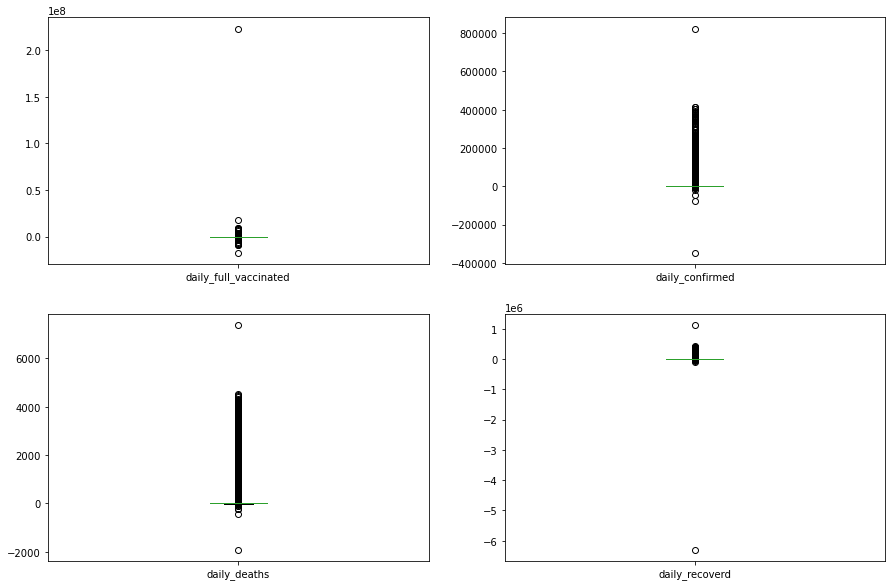

In [33]:
# check values
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
clean_df["daily_full_vaccinated"].plot(kind = "box")

plt.subplot(2,2,2)
clean_df["daily_confirmed"].plot(kind = "box")

plt.subplot(2,2,3)
clean_df["daily_deaths"].plot(kind = "box")

plt.subplot(2,2,4)
clean_df["daily_recoverd"].plot(kind = "box")

In [34]:
#check
clean_df["daily_full_vaccinated"].describe()

count    9.952200e+04
mean     7.529769e+03
std      7.208616e+05
min     -1.785655e+07
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.232990e+08
Name: daily_full_vaccinated, dtype: float64

### There are negative values.. Lets investigate this

In [35]:
# Check negatives
clean_df[clean_df["daily_full_vaccinated"]<0]

,date,country,cumulative_confirmed,cumulative_recovered,cumulative_deaths,partially_vaccinated,fully_vaccinated,population,pop_density,continent,income_level,median_age,total_tests_per_million,daily_confirmed,daily_recoverd,daily_deaths,daily_full_vaccinated
986,2021-05-09,Albania,131723,117089,2412,0,0,2874759,105.029,Europe,Upper middle income,36.399,2.686382e+05,57,963,1,-655
2007,2021-05-04,Andorra,13316,12818,127,0,0,77384,164.394,Europe,High income,46.200,2.501745e+06,21,25,0,-4699
3583,2021-06-10,Argentina,4066156,3639402,83941,0,0,45595737,16.515,South America,Upper middle income,31.532,3.446379e+05,27628,30507,669,-3124085
5091,2021-05-10,Austria,631896,605441,10392,0,0,9056001,109.289,Europe,High income,43.483,5.541474e+06,820,1540,10,-972493
7143,2021-05-10,Bangladesh,775027,712277,11972,0,0,166271404,1265.187,Asia,Lower middle income,27.567,3.782093e+04,1514,2115,38,-3496186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89736,2021-05-10,Thailand,85005,26873,421,0,0,69969167,136.624,Asia,Upper middle income,40.102,1.161893e+05,1630,0,22,-513454
91787,2021-05-09,Tunisia,320813,277497,11429,0,0,11937842,76.072,Africa,Lower middle income,32.835,1.338532e+05,1301,1299,79,-148943
94866,2021-05-10,United Kingdom,4437316,0,127609,0,0,68230263,280.602,Europe,High income,40.467,2.931615e+06,2357,0,4,-17856550
97437,2021-05-16,Vietnam,4212,2668,37,954520,22512,98183253,291.000,Asia,Lower middle income,30.500,6.398665e+04,100,0,1,-14633


In [36]:
# check cause for United Kingdom
clean_df.iloc[94864:94869,:]

,date,country,cumulative_confirmed,cumulative_recovered,cumulative_deaths,partially_vaccinated,fully_vaccinated,population,pop_density,continent,income_level,median_age,total_tests_per_million,daily_confirmed,daily_recoverd,daily_deaths,daily_full_vaccinated
94864,2021-05-08,United Kingdom,4433189,0,127603,35371669,17669379,68230263,280.602,Europe,High income,40.467,2.931615e+06,2051,0,5,438837
94865,2021-05-09,United Kingdom,4434959,0,127605,35472295,17856550,68230263,280.602,Europe,High income,40.467,2.931615e+06,1770,0,2,187171
94866,2021-05-10,United Kingdom,4437316,0,127609,0,0,68230263,280.602,Europe,High income,40.467,2.931615e+06,2357,0,4,-17856550
94867,2021-05-11,United Kingdom,4439800,0,127629,35587348,18088385,68230263,280.602,Europe,High income,40.467,2.931615e+06,2484,0,20,18088385
94868,2021-05-12,United Kingdom,4442084,0,127640,35722461,18438532,68230263,280.602,Europe,High income,40.467,2.931615e+06,2284,0,11,350147


In [37]:
#check for daily_confirmed
clean_df[clean_df["daily_confirmed"]<0]

,date,country,cumulative_confirmed,cumulative_recovered,cumulative_deaths,partially_vaccinated,fully_vaccinated,population,pop_density,continent,income_level,median_age,total_tests_per_million,daily_confirmed,daily_recoverd,daily_deaths,daily_full_vaccinated
2728,2020-07-03,Antigua and Barbuda,68,23,3,0,0,98711,222.564,North America,High income,33.976,1.691807e+05,-1,0,0,0
3038,2021-05-09,Antigua and Barbuda,1231,1168,32,0,0,98711,222.564,North America,High income,33.976,1.691807e+05,-1,154,0,0
9352,2020-05-19,Benin,130,83,2,0,0,12427935,107.513,Africa,Lower middle income,18.781,4.862513e+04,-209,0,0,0
18601,2020-06-03,China,84160,79404,4638,0,0,1439323776,156.110,Asia,Upper middle income,38.422,1.111633e+05,-1,4,0,0
21875,2020-12-16,Cote d'Ivoire,21741,21364,133,0,0,27005408,82.951,Africa,Upper middle income,18.900,2.423914e+04,-34,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94835,2021-04-09,United Kingdom,4365486,0,127040,32010244,6991310,68230263,280.602,Europe,High income,40.467,2.931615e+06,-4860,0,60,450136
94874,2021-05-18,United Kingdom,4450501,0,127691,36811405,20546452,68230263,280.602,Europe,High income,40.467,2.931615e+06,-2364,0,7,259049
94986,2020-04-12,Uruguay,480,231,7,0,0,3485357,19.848,South America,High income,35.760,7.561082e+05,-21,7,0,0
98185,2020-08-11,Yemen,1831,919,523,0,0,30457162,56.492,Asia,Lower middle income,20.221,3.022343e+03,-1,4,5,0


In [38]:
clean_df.iloc[94834:94837]

,date,country,cumulative_confirmed,cumulative_recovered,cumulative_deaths,partially_vaccinated,fully_vaccinated,population,pop_density,continent,income_level,median_age,total_tests_per_million,daily_confirmed,daily_recoverd,daily_deaths,daily_full_vaccinated
94834,2021-04-08,United Kingdom,4370346,0,126980,31903366,6541174,68230263,280.602,Europe,High income,40.467,2.931615e+06,3030,0,53,449269
94835,2021-04-09,United Kingdom,4365486,0,127040,32010244,6991310,68230263,280.602,Europe,High income,40.467,2.931615e+06,-4860,0,60,450136
94836,2021-04-10,United Kingdom,4368070,0,127080,32121353,7466540,68230263,280.602,Europe,High income,40.467,2.931615e+06,2584,0,40,475230


In [39]:
#check for daily_recoverd

clean_df[clean_df["daily_recoverd"]<0]

,date,country,cumulative_confirmed,cumulative_recovered,cumulative_deaths,partially_vaccinated,fully_vaccinated,population,pop_density,continent,income_level,median_age,total_tests_per_million,daily_confirmed,daily_recoverd,daily_deaths,daily_full_vaccinated
416,2021-03-13,Afghanistan,55959,49471,2454,8200,0,39770634,59.627,Asia,Low income,18.438,1.389312e+04,0,-28,0,0
1088,2020-03-24,Algeria,264,24,19,0,0,44612800,18.411,Africa,Lower middle income,28.521,5.174770e+03,34,-41,2,0
1090,2020-03-26,Algeria,367,29,25,0,0,44612800,18.411,Africa,Lower middle income,28.521,5.174770e+03,65,-36,4,0
1150,2020-05-25,Algeria,8503,4747,609,0,0,44612800,18.411,Africa,Lower middle income,28.521,5.174770e+03,197,-37,9,0
1590,2020-03-13,Andorra,1,0,0,0,0,77384,164.394,Europe,High income,46.200,2.501745e+06,0,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97054,2020-04-28,Vietnam,270,222,0,0,0,98183253,291.000,Asia,Lower middle income,30.500,6.398665e+04,0,-3,0,0
97056,2020-04-30,Vietnam,270,219,0,0,0,98183253,291.000,Asia,Lower middle income,30.500,6.398665e+04,0,-3,0,0
97160,2020-08-12,Vietnam,883,409,18,0,0,98183253,291.000,Asia,Lower middle income,30.500,6.398665e+04,17,-42,2,0
97545,2020-04-06,West Bank and Gaza,254,24,1,0,0,4817000,654.000,Asia,Lower middle income,19.100,7.790949e+03,17,-1,0,0


In [40]:
clean_df.iloc[97566:97568]

,date,country,cumulative_confirmed,cumulative_recovered,cumulative_deaths,partially_vaccinated,fully_vaccinated,population,pop_density,continent,income_level,median_age,total_tests_per_million,daily_confirmed,daily_recoverd,daily_deaths,daily_full_vaccinated
97566,2020-04-27,West Bank and Gaza,342,83,2,0,0,4817000,654.0,Asia,Lower middle income,19.1,7790.948723,0,0,0,0
97567,2020-04-28,West Bank and Gaza,343,71,2,0,0,4817000,654.0,Asia,Lower middle income,19.1,7790.948723,1,-12,0,0


In [41]:
#check for daily_deaths
clean_df[clean_df["daily_deaths"]<0]

,date,country,cumulative_confirmed,cumulative_recovered,cumulative_deaths,partially_vaccinated,fully_vaccinated,population,pop_density,continent,income_level,median_age,total_tests_per_million,daily_confirmed,daily_recoverd,daily_deaths,daily_full_vaccinated
2312,2020-10-08,Angola,5958,2635,208,0,0,33845950,26.363,Africa,Lower middle income,16.677,1.797713e+04,233,37,-3,0
4235,2020-06-01,Australia,7221,6626,102,0,0,25785033,3.319,Oceania,High income,37.875,7.596788e+05,19,8,-1,0
4798,2020-07-21,Austria,19827,17716,710,0,0,9056001,109.289,Europe,High income,43.483,5.541474e+06,84,57,-1,0
4880,2020-10-11,Austria,55319,43448,851,0,0,9056001,109.289,Europe,High income,43.483,5.541474e+06,896,619,-1,0
8425,2020-08-26,Belgium,83030,18331,9879,0,0,11638325,382.748,Europe,High income,41.928,1.261986e+06,583,40,-117,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87156,2021-04-25,Switzerland,646509,317600,10570,1568918,857397,8715690,219.016,Europe,High income,43.053,9.276167e+05,0,0,-24,14873
87209,2021-06-17,Switzerland,701454,317600,10867,3752011,2341263,8715690,219.016,Europe,High income,43.053,9.276167e+05,194,0,-1,0
88562,2020-12-13,Tajikistan,12704,12133,88,0,0,9743460,68.145,Asia,Low income,22.416,0.000000e+00,80,83,-1,0
96544,2020-05-01,Venezuela,335,148,10,0,0,28358019,32.238,South America,Lower middle income,29.600,1.184502e+05,2,6,-6,0


In [42]:
clean_df.iloc[2311:2314]

,date,country,cumulative_confirmed,cumulative_recovered,cumulative_deaths,partially_vaccinated,fully_vaccinated,population,pop_density,continent,income_level,median_age,total_tests_per_million,daily_confirmed,daily_recoverd,daily_deaths,daily_full_vaccinated
2311,2020-10-07,Angola,5725,2598,211,0,0,33845950,26.363,Africa,Lower middle income,16.677,17977.128726,0,0,0,0
2312,2020-10-08,Angola,5958,2635,208,0,0,33845950,26.363,Africa,Lower middle income,16.677,17977.128726,233,37,-3,0
2313,2020-10-09,Angola,6031,2685,212,0,0,33845950,26.363,Africa,Lower middle income,16.677,17977.128726,73,50,4,0


## Observations

* #### We note some wrong inputs in cummulative values. So we need to replace wrong cummulative values - when it is smaller than that for the day before - with the last value.

### Code

In [43]:
def correct_col(clean_df,column):
    """
    clean_df
    column: column needed to correct its values. >> 
    
    valid for:
    
    cumulative_confirmed,cumulative_recovered,cumulative_deaths,fully_vaccinated,partially_vaccinated
    """
    col = []
    for j in clean_df["country"].unique():
        df = clean_df[clean_df['country']==j][column].reset_index(drop = True).copy()
        col.append(df.iloc[0])
        for i in range(len(df)-1):
            if df.iloc[i+1]>=col[-1]:
                col.append(df.iloc[i+1]) 
            else:
                col.append(col[-1])
    return col

In [44]:
clean_df["cumulative_confirmed"] = correct_col(clean_df,"cumulative_confirmed")
clean_df["cumulative_recovered"] = correct_col(clean_df,"cumulative_recovered")
clean_df["cumulative_deaths"] = correct_col(clean_df,"cumulative_deaths")
clean_df["fully_vaccinated"] = correct_col(clean_df,"fully_vaccinated")
clean_df["partially_vaccinated"] = correct_col(clean_df,"partially_vaccinated")

In [45]:
#apply daily function again
clean_df["daily_confirmed"]= daily_cases(clean_df,"cumulative_confirmed")
clean_df["daily_recoverd"]= daily_cases(clean_df,"cumulative_recovered")
clean_df["daily_deaths"]= daily_cases(clean_df,"cumulative_deaths")
clean_df["daily_full_vaccinated"]= daily_cases(clean_df,"fully_vaccinated")

#check for nulls and duplicates
print("Null values:\n",clean_df.isnull().sum().sort_values(ascending = False))
print("\nDuplicates: ", clean_df.duplicated().sum())

Null values:
 date                       0
continent                  0
daily_deaths               0
daily_recoverd             0
daily_confirmed            0
total_tests_per_million    0
median_age                 0
income_level               0
pop_density                0
country                    0
population                 0
fully_vaccinated           0
partially_vaccinated       0
cumulative_deaths          0
cumulative_recovered       0
cumulative_confirmed       0
daily_full_vaccinated      0
dtype: int64

Duplicates:  0


In [46]:
#check for negative values again
clean_df[clean_df["daily_confirmed"]<0]


,date,country,cumulative_confirmed,cumulative_recovered,cumulative_deaths,partially_vaccinated,fully_vaccinated,population,pop_density,continent,income_level,median_age,total_tests_per_million,daily_confirmed,daily_recoverd,daily_deaths,daily_full_vaccinated


In [47]:
clean_df[clean_df["daily_recoverd"]<0]


,date,country,cumulative_confirmed,cumulative_recovered,cumulative_deaths,partially_vaccinated,fully_vaccinated,population,pop_density,continent,income_level,median_age,total_tests_per_million,daily_confirmed,daily_recoverd,daily_deaths,daily_full_vaccinated


In [48]:
clean_df[clean_df["daily_deaths"]<0]

,date,country,cumulative_confirmed,cumulative_recovered,cumulative_deaths,partially_vaccinated,fully_vaccinated,population,pop_density,continent,income_level,median_age,total_tests_per_million,daily_confirmed,daily_recoverd,daily_deaths,daily_full_vaccinated


In [49]:
clean_df[clean_df["daily_full_vaccinated"]<0]

,date,country,cumulative_confirmed,cumulative_recovered,cumulative_deaths,partially_vaccinated,fully_vaccinated,population,pop_density,continent,income_level,median_age,total_tests_per_million,daily_confirmed,daily_recoverd,daily_deaths,daily_full_vaccinated


<AxesSubplot:>

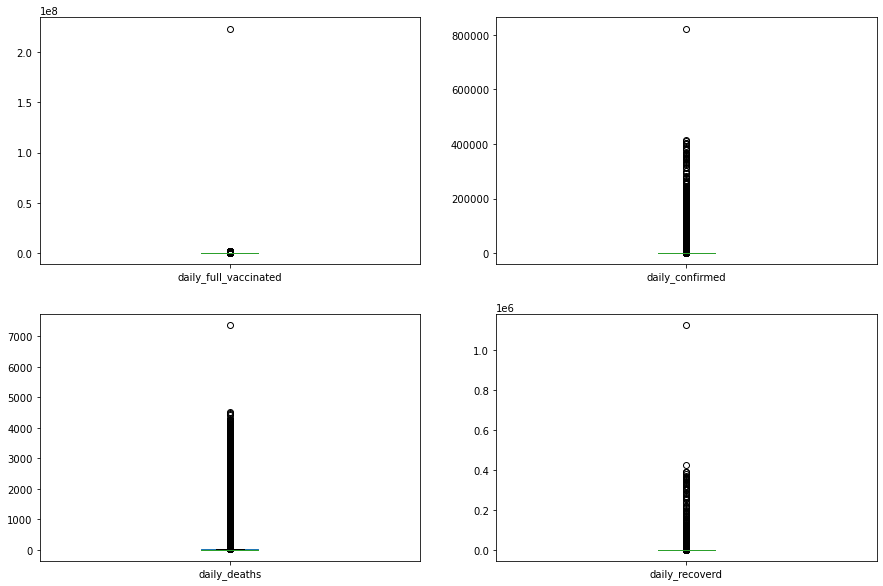

In [50]:
# check values
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
clean_df["daily_full_vaccinated"].plot(kind = "box")

plt.subplot(2,2,2)
clean_df["daily_confirmed"].plot(kind = "box")

plt.subplot(2,2,3)
clean_df["daily_deaths"].plot(kind = "box")

plt.subplot(2,2,4)
clean_df["daily_recoverd"].plot(kind = "box")

In [51]:
clean_df

,date,country,cumulative_confirmed,cumulative_recovered,cumulative_deaths,partially_vaccinated,fully_vaccinated,population,pop_density,continent,income_level,median_age,total_tests_per_million,daily_confirmed,daily_recoverd,daily_deaths,daily_full_vaccinated
0,2020-01-22,Afghanistan,0,0,0,0,0,39770634,59.627,Asia,Low income,18.438,13893.115207,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0,0,39770634,59.627,Asia,Low income,18.438,13893.115207,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0,0,39770634,59.627,Asia,Low income,18.438,13893.115207,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0,0,39770634,59.627,Asia,Low income,18.438,13893.115207,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0,0,39770634,59.627,Asia,Low income,18.438,13893.115207,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99517,2021-06-13,Zimbabwe,39959,37004,1632,693147,413911,15071278,38.420,Africa,Lower middle income,18.668,40542.149113,107,12,0,14857
99518,2021-06-14,Zimbabwe,40077,37027,1635,693568,414635,15071278,38.420,Africa,Lower middle income,18.668,40542.149113,118,23,3,724
99519,2021-06-15,Zimbabwe,40318,37056,1637,693568,414635,15071278,38.420,Africa,Lower middle income,18.668,40542.149113,241,29,2,0
99520,2021-06-16,Zimbabwe,40556,37075,1640,693568,414635,15071278,38.420,Africa,Lower middle income,18.668,40542.149113,238,19,3,0


## Now Lets create a copy to work with

In [52]:
timeseries_df = clean_df.copy()

In [53]:
timeseries_df.head()

,date,country,cumulative_confirmed,cumulative_recovered,cumulative_deaths,partially_vaccinated,fully_vaccinated,population,pop_density,continent,income_level,median_age,total_tests_per_million,daily_confirmed,daily_recoverd,daily_deaths,daily_full_vaccinated
0,2020-01-22,Afghanistan,0,0,0,0,0,39770634,59.627,Asia,Low income,18.438,13893.115207,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0,0,39770634,59.627,Asia,Low income,18.438,13893.115207,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0,0,39770634,59.627,Asia,Low income,18.438,13893.115207,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0,0,39770634,59.627,Asia,Low income,18.438,13893.115207,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0,0,39770634,59.627,Asia,Low income,18.438,13893.115207,0,0,0,0


# Add some columns that will help us with the analysis

In [54]:
# Add 
timeseries_df['year'] = [d.year for d in timeseries_df.date]
#name of month
timeseries_df['month'] = [d.strftime('%b') for d in timeseries_df.date]
timeseries_df['daily_cases_per_million'] = (timeseries_df["daily_confirmed"]/ timeseries_df["population"])*1000000
timeseries_df['daily_deaths_per_million'] = (timeseries_df["daily_deaths"]/ timeseries_df["population"])*1000000
timeseries_df['daily_full_vaccinated_per_million'] = (timeseries_df["daily_full_vaccinated"]/ timeseries_df["population"])*1000000
timeseries_df['Deaths_to_confirmed_ratio'] = (timeseries_df["cumulative_deaths"]/ timeseries_df["cumulative_confirmed"]).replace(np.inf,np.nan)
timeseries_df

,date,country,cumulative_confirmed,cumulative_recovered,cumulative_deaths,partially_vaccinated,fully_vaccinated,population,pop_density,continent,...,daily_confirmed,daily_recoverd,daily_deaths,daily_full_vaccinated,year,month,daily_cases_per_million,daily_deaths_per_million,daily_full_vaccinated_per_million,Deaths_to_confirmed_ratio
0,2020-01-22,Afghanistan,0,0,0,0,0,39770634,59.627,Asia,...,0,0,0,0,2020,Jan,0.000000,0.000000,0.000000,NaN
1,2020-01-23,Afghanistan,0,0,0,0,0,39770634,59.627,Asia,...,0,0,0,0,2020,Jan,0.000000,0.000000,0.000000,NaN
2,2020-01-24,Afghanistan,0,0,0,0,0,39770634,59.627,Asia,...,0,0,0,0,2020,Jan,0.000000,0.000000,0.000000,NaN
3,2020-01-25,Afghanistan,0,0,0,0,0,39770634,59.627,Asia,...,0,0,0,0,2020,Jan,0.000000,0.000000,0.000000,NaN
4,2020-01-26,Afghanistan,0,0,0,0,0,39770634,59.627,Asia,...,0,0,0,0,2020,Jan,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99517,2021-06-13,Zimbabwe,39959,37004,1632,693147,413911,15071278,38.420,Africa,...,107,12,0,14857,2021,Jun,7.099597,0.000000,985.782360,0.040842
99518,2021-06-14,Zimbabwe,40077,37027,1635,693568,414635,15071278,38.420,Africa,...,118,23,3,724,2021,Jun,7.829462,0.199054,48.038395,0.040796
99519,2021-06-15,Zimbabwe,40318,37056,1637,693568,414635,15071278,38.420,Africa,...,241,29,2,0,2021,Jun,15.990681,0.132703,0.000000,0.040602
99520,2021-06-16,Zimbabwe,40556,37075,1640,693568,414635,15071278,38.420,Africa,...,238,19,3,0,2021,Jun,15.791627,0.199054,0.000000,0.040438


### We have Nan values Deaths_to_confirmed_ratio column related to the days before the first wave. However ,lets keep them so as not to affect the calculation of mean Deaths_to_confirmed_ratio.

# IMPORTANT NOTES

**1-** There are many variables that may affect the daily covid cases,like test rates,median age,income level,population,population density,etc...therefore comparisons will be hard.

For example, countries with high test rates can get higher numbers of daily cases than others. If we try to find the effect of another variable like median age on number of daily cases, we can be misleaded and get inaccurate insights due to interference with the effect of the test rate. 

**2-** To get accurate analysis we need to see the effect of one variable making other variables constant as much as possible.

**3-** So, I will cut some numeric variables like,pop_density,median_age,etc.. into two levels based on their median, and our comparisons will be based on these levels. This won't solve the problem completely but it will help see more clearly through the data.

**4-** Also, daily confirmed cases may be affected by population size.

For ex: high population size will give high number of cases than other country with small population even if virus spreading in small population countries is higher. To track the panademic spread,wave strength of different countries and when we need to exclude this effect for investigating the effect other parameters on the panademic spread, we need to use daily cases per one million of the population instead. This will exclude population size effect.


# Median split

### 1- Total Tests Per Million

In [55]:
test_per_million= timeseries_df.groupby(["country","total_tests_per_million"],as_index = False).mean()["total_tests_per_million"]
test_per_million.describe()

count    1.940000e+02
mean     5.882657e+05
std      1.191518e+06
min      0.000000e+00
25%      3.924275e+04
50%      2.036014e+05
75%      6.517530e+05
max      1.110910e+07
Name: total_tests_per_million, dtype: float64

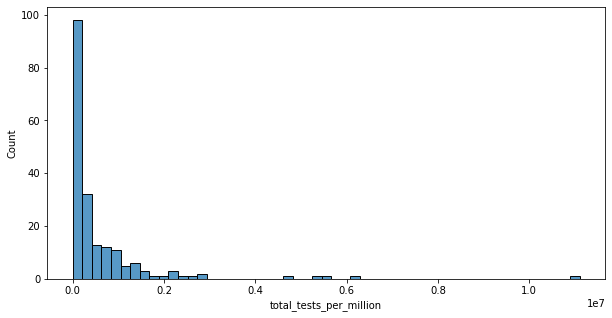

In [56]:
#tests_per_million distribution
plt.figure(figsize=(10,5))
sns.histplot(test_per_million);

In [57]:
#Add_two levels based on median
timeseries_df["test_per_million_level"] = pd.cut(timeseries_df["total_tests_per_million"],
                                        bins =[0,2e5,12e6],include_lowest =True,
                                    labels=["Low","High"])

### 2- Median Age

In [58]:
median_age= timeseries_df.groupby(["country","median_age"],as_index = False).mean()["median_age"]
median_age.describe()

count    194.000000
mean      30.310169
std        9.482776
min        0.000000
25%       21.960000
50%       29.710500
75%       38.298000
max       55.000000
Name: median_age, dtype: float64

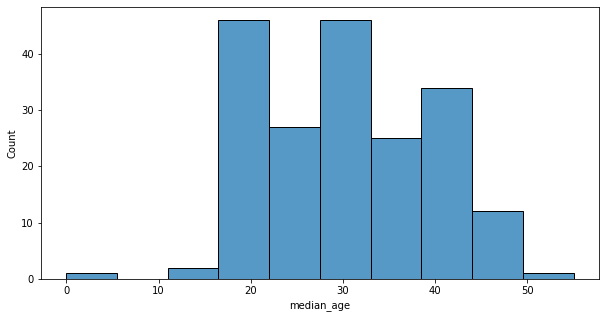

In [59]:
#median_age distribution
plt.figure(figsize=(10,5))
sns.histplot(timeseries_df.groupby(["country","median_age"],as_index = False).mean()["median_age"]);

In [60]:
#Add_levels

timeseries_df["median_age_level"] = pd.cut(timeseries_df["median_age"], bins =[0,30,55],
                                    include_lowest =True,
                                labels=["Low","High"])

### 3- Population Density

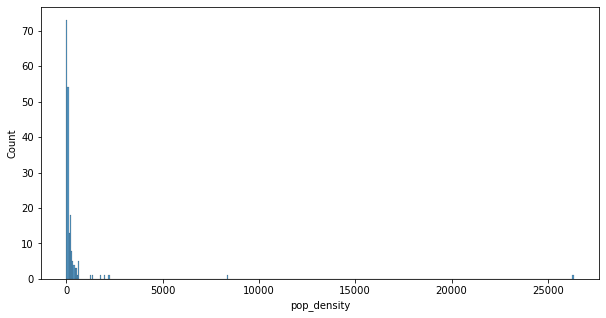

In [61]:
#pop_density distribution
plt.figure(figsize=(10,5))
sns.histplot(timeseries_df.groupby(["country","pop_density"],as_index = False).mean()["pop_density"]);

In [62]:
pop_density_group = timeseries_df.groupby(["country","pop_density"],as_index = False).mean()["pop_density"]
pop_density_group.describe()

count      194.000000
mean       353.414485
std       1987.725949
min          2.110000
25%         35.381000
50%         87.744500
75%        211.726000
max      26338.255000
Name: pop_density, dtype: float64

In [63]:
timeseries_df["pop_density_level"] = pd.cut(timeseries_df["pop_density"],
                                            bins =[0,88,27000],
                                            labels=["Low","High"])

In [64]:
timeseries_df

,date,country,cumulative_confirmed,cumulative_recovered,cumulative_deaths,partially_vaccinated,fully_vaccinated,population,pop_density,continent,...,daily_full_vaccinated,year,month,daily_cases_per_million,daily_deaths_per_million,daily_full_vaccinated_per_million,Deaths_to_confirmed_ratio,test_per_million_level,median_age_level,pop_density_level
0,2020-01-22,Afghanistan,0,0,0,0,0,39770634,59.627,Asia,...,0,2020,Jan,0.000000,0.000000,0.000000,NaN,Low,Low,Low
1,2020-01-23,Afghanistan,0,0,0,0,0,39770634,59.627,Asia,...,0,2020,Jan,0.000000,0.000000,0.000000,NaN,Low,Low,Low
2,2020-01-24,Afghanistan,0,0,0,0,0,39770634,59.627,Asia,...,0,2020,Jan,0.000000,0.000000,0.000000,NaN,Low,Low,Low
3,2020-01-25,Afghanistan,0,0,0,0,0,39770634,59.627,Asia,...,0,2020,Jan,0.000000,0.000000,0.000000,NaN,Low,Low,Low
4,2020-01-26,Afghanistan,0,0,0,0,0,39770634,59.627,Asia,...,0,2020,Jan,0.000000,0.000000,0.000000,NaN,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99517,2021-06-13,Zimbabwe,39959,37004,1632,693147,413911,15071278,38.420,Africa,...,14857,2021,Jun,7.099597,0.000000,985.782360,0.040842,Low,Low,Low
99518,2021-06-14,Zimbabwe,40077,37027,1635,693568,414635,15071278,38.420,Africa,...,724,2021,Jun,7.829462,0.199054,48.038395,0.040796,Low,Low,Low
99519,2021-06-15,Zimbabwe,40318,37056,1637,693568,414635,15071278,38.420,Africa,...,0,2021,Jun,15.990681,0.132703,0.000000,0.040602,Low,Low,Low
99520,2021-06-16,Zimbabwe,40556,37075,1640,693568,414635,15071278,38.420,Africa,...,0,2021,Jun,15.791627,0.199054,0.000000,0.040438,Low,Low,Low


In [65]:
timeseries_df.columns

Index(['date', 'country', 'cumulative_confirmed', 'cumulative_recovered',
       'cumulative_deaths', 'partially_vaccinated', 'fully_vaccinated',
       'population', 'pop_density', 'continent', 'income_level', 'median_age',
       'total_tests_per_million', 'daily_confirmed', 'daily_recoverd',
       'daily_deaths', 'daily_full_vaccinated', 'year', 'month',
       'daily_cases_per_million', 'daily_deaths_per_million',
       'daily_full_vaccinated_per_million', 'Deaths_to_confirmed_ratio',
       'test_per_million_level', 'median_age_level', 'pop_density_level'],
      dtype='object')

<a id='explore'></a>

# 4- Data Exploration

<a id='uni'></a>
## 4.1 Univariate Explorations

### Population density exploration

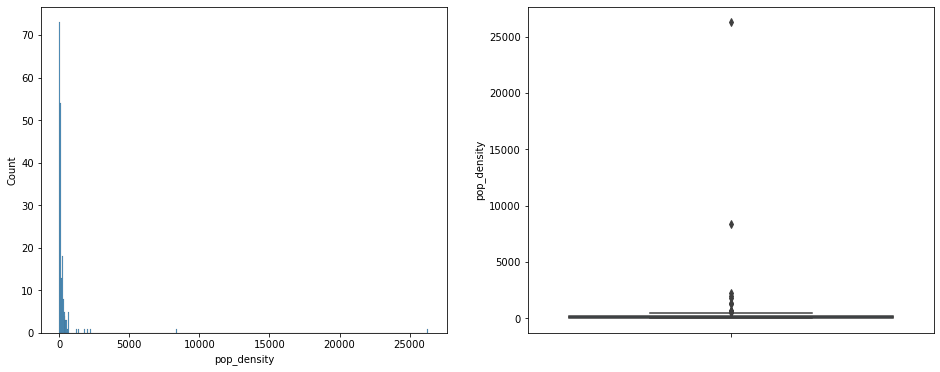

In [66]:
#1- get data for each country avoid repeatition
pop_density = timeseries_df.groupby(["country","pop_density"],as_index = False).sum()["pop_density"]
plt.subplots(figsize=(16,6))

plt.subplot(1,2,1)
sns.histplot(x= pop_density);
plt.subplot(1,2,2)
sns.boxplot(y= pop_density);

### Median age exploration

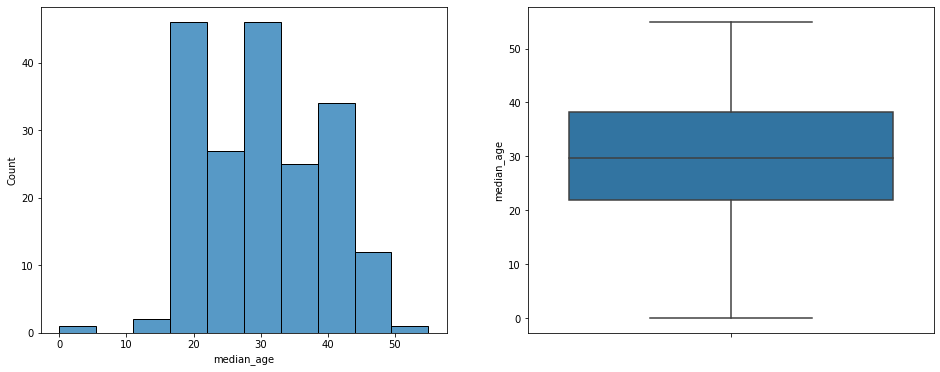

In [67]:
# median age exploration

#1- get data for each country avoid repeatition
median_age = timeseries_df.groupby(["country","median_age"],as_index = False).sum()["median_age"]
plt.subplots(figsize=(16,6))

plt.subplot(1,2,1)
sns.histplot(x= median_age);
plt.subplot(1,2,2)
sns.boxplot(y= median_age);

# Note:
1- There are some outliers in population density distribution.

2- No outliers werw found in median age distribution but there is a wrong value of (0) should be removed.

### Total_tests_per_million exploration

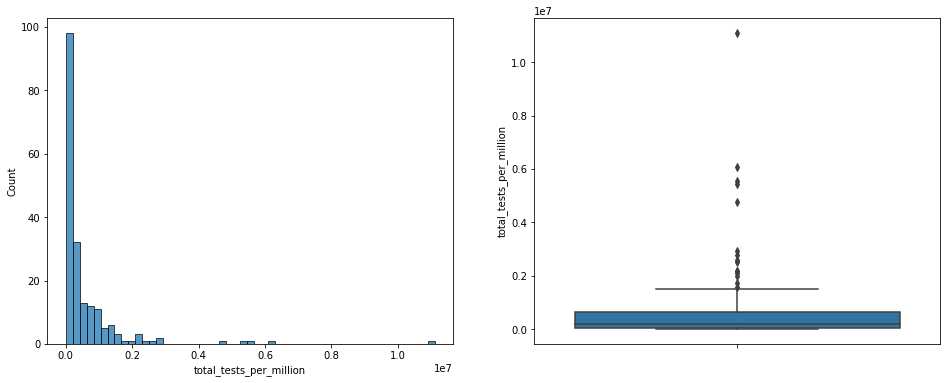

In [68]:
# total_tests_per_million exploration
tests = timeseries_df.groupby(["country","total_tests_per_million"],as_index = False).sum()["total_tests_per_million"]

plt.subplots(figsize=(16,6))

plt.subplot(1,2,1)
sns.histplot(x= tests);
plt.subplot(1,2,2)
sns.boxplot(y=tests);

### Note:
1- There are some outliers.

2- Varaition between countries in testing rate is not small at all. This should be taken into consideration in the analysis.


<a id='bi'></a>
# 4.2 Bivariate Explorations

### Explore average daily cases per million distribution in each month

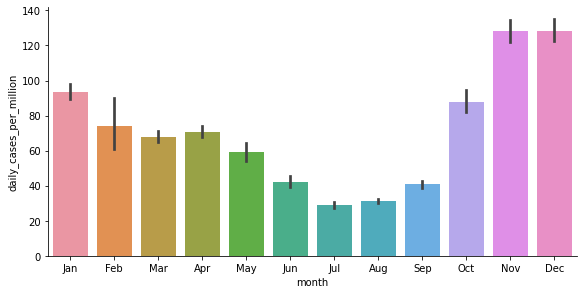

In [69]:
# average Daily_cases_per_million distribution in each month for the the whole world?
sns.catplot(x ="month",y = "daily_cases_per_million",data =timeseries_df,kind = "bar",height=4,aspect=2);

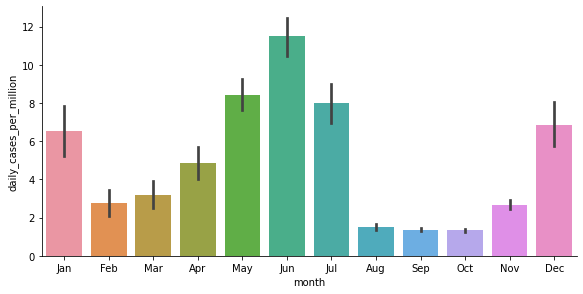

In [70]:
# average Daily_cases_per_million distribution in each month for Egypt?
sns.catplot(x ="month",y = "daily_cases_per_million",data = timeseries_df[timeseries_df["country"] == "Egypt"],
            kind = "bar",height=4,aspect=2)

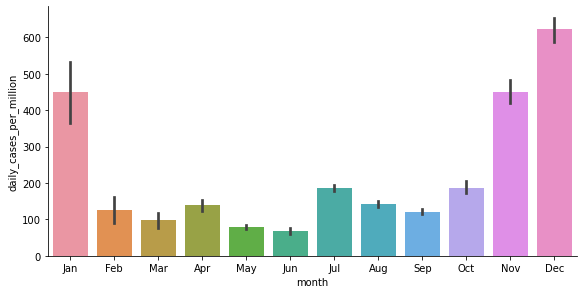

In [71]:
# average Daily_cases_per_million distribution in each month for US?
sns.catplot(x ="month",y = "daily_cases_per_million",data = timeseries_df[timeseries_df["country"] == "US"],
            kind = "bar",height=4,aspect=2);

# Note: 

The Cases distribution based on months follow different patterns for different countries and the whole world data can't be generalized.

###  TOTAL Tests per million for different countries.

<Figure size 1152x432 with 0 Axes>

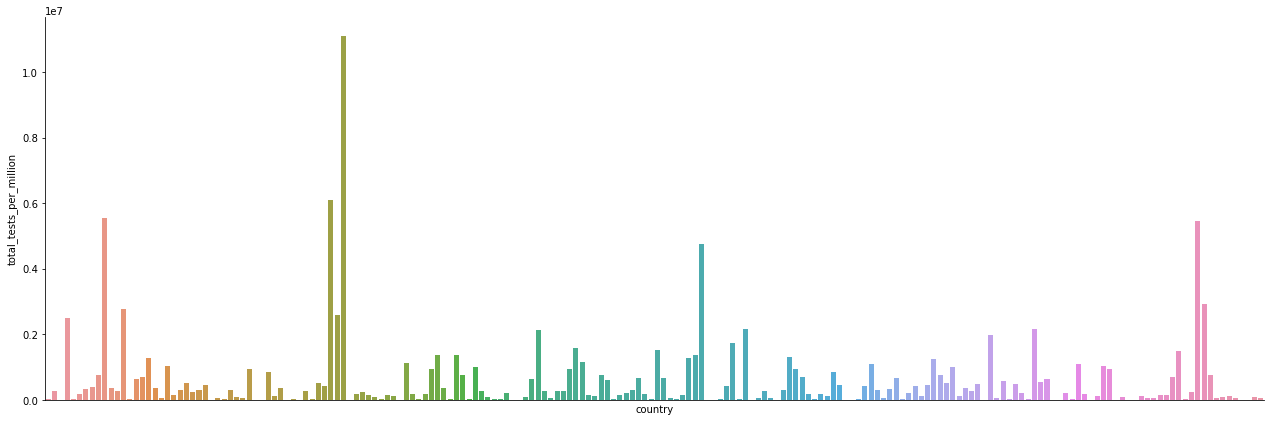

In [72]:
# TOTAL Tests per million for different countries.
plt.figure(figsize=(16,6))
sns.catplot(x="country",y= "total_tests_per_million",data = timeseries_df,
            kind = "bar", height=6,aspect=3);
plt.xticks([]);#remove countries as they are too many.

### Empahsis of that :
Big Varaition between countries in testing rate.

## Pairplot for effect of population density, median age and vaccination on Daily cases per million

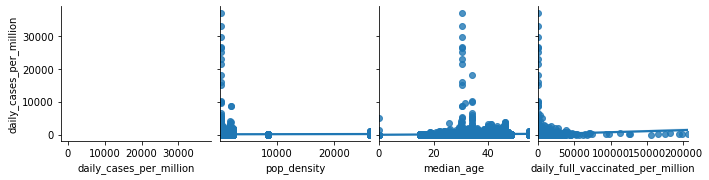

In [73]:
sns.pairplot(y_vars="daily_cases_per_million",data = timeseries_df[["daily_cases_per_million","pop_density","median_age","daily_full_vaccinated_per_million"]],
             kind = "reg");

## Note: 

This can't give us a clear idea. There are outliers that should be removed during analysis, but we can't remove it from the dataset at all.Some observations could have outliers in only one attributte and all other attributes don't form outliers so removing outliers will be based on the reasearch question.

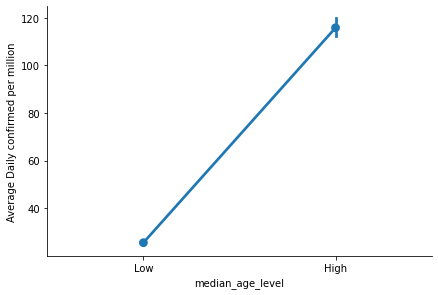

In [74]:
sns.catplot(y = "daily_cases_per_million",
            x= "median_age_level",
            data = timeseries_df,
            kind = "point",
            split = True,
           margin_titles=True,height=4,aspect=1.5);
plt.ylabel("Average Daily confirmed per million");

## Note:
High median age countries experience higher avearge daily confirmed cases per million 

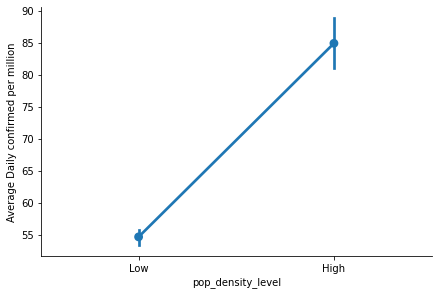

In [75]:
sns.catplot(y = "daily_cases_per_million",
            x= "pop_density_level",
            data = timeseries_df,
            kind = "point",
            split = True,
           margin_titles=True,height=4,aspect=1.5);
plt.ylabel("Average Daily confirmed per million");

## Note:
High population density countries experience higher avearge daily confirmed cases per million 

# Average Cases in each Continent

In [76]:
continent_df = timeseries_df.groupby("continent",as_index = False).sum()[["continent","daily_deaths","daily_confirmed","population"]].drop(6)
continent_df["total_cases_per_million"] = (continent_df["daily_confirmed"]/continent_df["population"])*1000000
continent_df["total_deaths_per_million"] = (continent_df["daily_deaths"]/continent_df["population"])*1000000
continent_df["Deaths_to_confirmed_ratio"] = (continent_df["daily_deaths"]/continent_df["daily_confirmed"])
continent_df.rename(columns = {"daily_deaths":"total_deaths","daily_confirmed":"total_confirmed"},inplace =True)
continent_df

,continent,total_deaths,total_confirmed,population,total_cases_per_million,total_deaths_per_million,Deaths_to_confirmed_ratio
0,Africa,136278,5131055,701231849379,7.317202,0.194341,0.026559
1,Asia,869188,58358656,2442506200119,23.892941,0.355859,0.014894
2,Europe,980272,43368658,319083295464,135.916416,3.072151,0.022603
3,North America,894079,39352698,303754076217,129.554469,2.943430,0.022720
4,Oceania,1110,51392,21715264350,2.366630,0.051116,0.021599
5,South America,960174,31207198,222578994366,140.207292,4.313857,0.030768


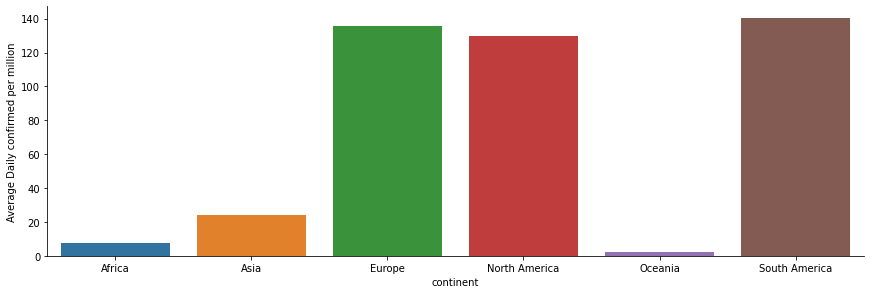

In [77]:
sns.catplot(y = "total_cases_per_million",
            x= "continent",
            data = continent_df,
            kind = "bar",
           margin_titles=True,height=4,aspect=3);
plt.ylabel("Average Daily confirmed per million");

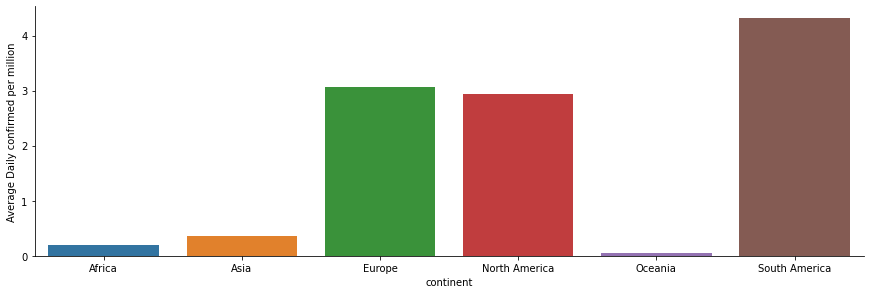

In [78]:
sns.catplot(y = "total_deaths_per_million",
            x= "continent",
            data = continent_df,
            kind = "bar",
           margin_titles=True,height=4,aspect=3);
plt.ylabel("Average Daily confirmed per million");

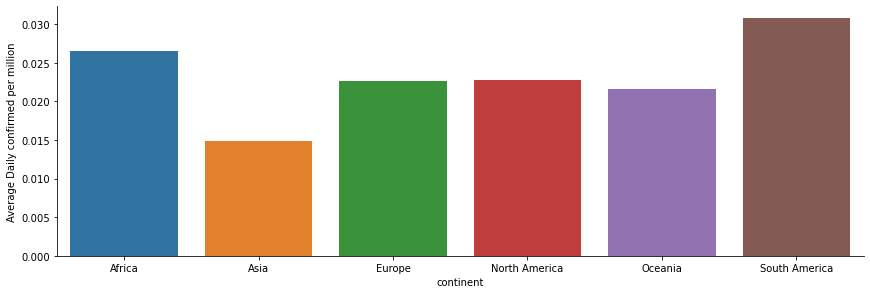

In [79]:
sns.catplot(y = "Deaths_to_confirmed_ratio",
            x= "continent",
            data = continent_df,
            kind = "bar",
           margin_titles=True,height=4,aspect=3);
plt.ylabel("Average Daily confirmed per million");

## Note:
1- we can see that even Africa has lower cases per million and deaths per million but has the second highest deaths to confirmed ratio. This can reflect quality of the heath care system of Africa.

2- South America is the most suffering continent.

3- Europe and North America reflect better heath care systems with their low death to confirmed ratios compared to their very high cases per million.


<a id='multi'></a>

# 4.3  Multivariate Explorations

# Take account of testing rate

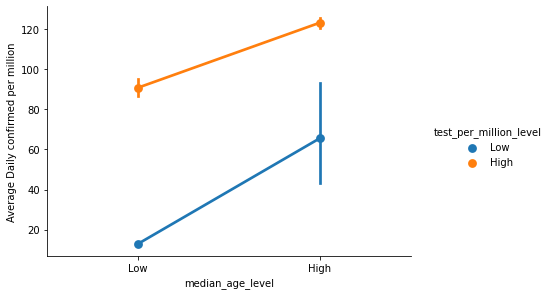

In [80]:
sns.catplot(y = "daily_cases_per_million",
            hue= "test_per_million_level",
            x= "median_age_level",
            data = timeseries_df,
            kind = "point",
            split = True,
           margin_titles=True,height=4,aspect=1.5);
plt.ylabel("Average Daily confirmed per million");

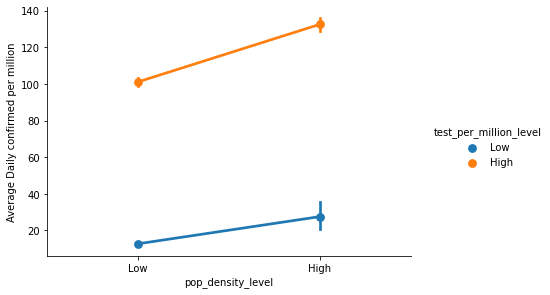

In [81]:
sns.catplot(y = "daily_cases_per_million",
            hue= "test_per_million_level",
            x= "pop_density_level",
            data = timeseries_df,
            kind = "point",
            split = True,
           margin_titles=True,height=4,aspect=1.5);
plt.ylabel("Average Daily confirmed per million");

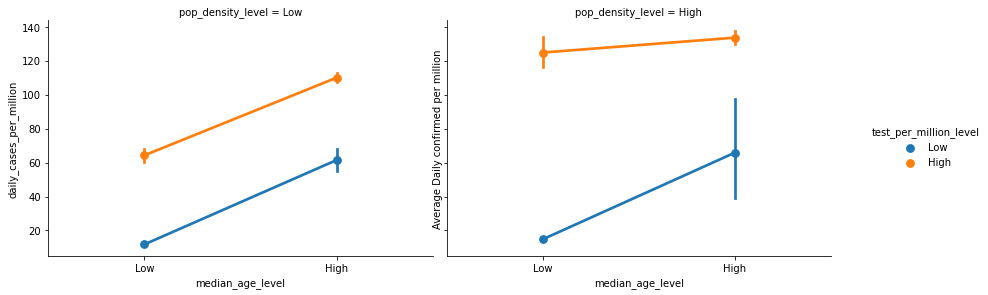

In [82]:
sns.catplot(col = "pop_density_level",
            y = "daily_cases_per_million",
            hue= "test_per_million_level",
            x= "median_age_level",
            data = timeseries_df,
            kind = "point",
            split = True,
           margin_titles=True,height=4,aspect=1.5);
plt.ylabel("Average Daily confirmed per million");

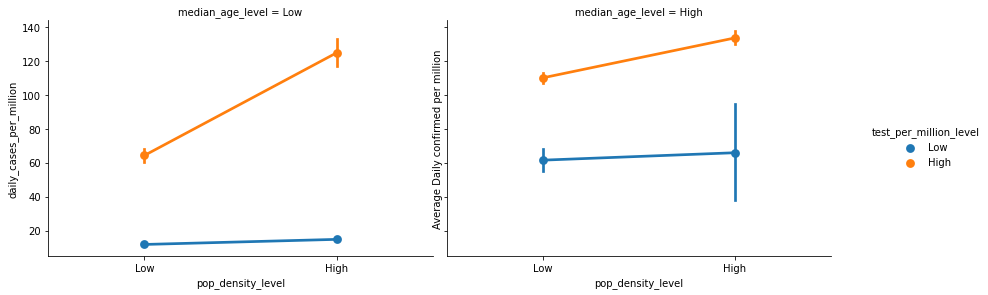

In [83]:
sns.catplot(col = "median_age_level",
            y = "daily_cases_per_million",
            hue= "test_per_million_level",
            x= "pop_density_level",
            data = timeseries_df,
            kind = "point",
            split = True,
           margin_titles=True,height=4,aspect=1.5);
plt.ylabel("Average Daily confirmed per million");

# Note:
1- As noticed befor high test rates will lead to higher cases discovery.

2- Dividing our data on different variables' levels can let us be more specific when taking about the effect of some variable on average daily cases per million and can give us more accurate insights from the general overview of the data.

<a id='research'></a>

# Our Research Questions Will Be:

1- What is the behavior of Covid19?
* Are Covid waves till now repeating with a pattern,ie are they coming in specific months?
* Does the waves' strength change or not?

2- How Can we rely on these data to make comparisons and extract conclusions?

3- What is the effect of Population density on daily cases?

4- What is the effect of median age on daily cases?

5- What is the effect of Income Level on daily cases?

6- What is the effect of Continent on daily cases?

7-  What is the effect of Vaccinations on daily cases?

#### Before starting to answer our questions lets create parameters dataframe
It will contain all countries with their average parameters through the panademic like average daily cases,deaths,etc.. 

In [84]:
parameter_df = timeseries_df.groupby(['country', 'continent', 'income_level',
        'test_per_million_level', 'median_age_level','pop_density_level'],as_index = False).mean()
parameter_df = parameter_df.dropna().reset_index(drop = True)
parameter_df

,country,continent,income_level,test_per_million_level,median_age_level,pop_density_level,cumulative_confirmed,cumulative_recovered,cumulative_deaths,partially_vaccinated,...,total_tests_per_million,daily_confirmed,daily_recoverd,daily_deaths,daily_full_vaccinated,year,daily_cases_per_million,daily_deaths_per_million,daily_full_vaccinated_per_million,Deaths_to_confirmed_ratio
0,Afghanistan,Asia,Low income,Low,Low,Low,36255.269006,28457.382066,1426.074074,49528.532164,...,1.389312e+04,188.169591,122.218324,7.489279,345.547758,2020.327485,4.731370,0.188312,8.688515,0.034584
1,Albania,Europe,Upper middle income,High,High,High,43439.610136,31987.192982,823.672515,34796.514620,...,2.686382e+05,258.247563,253.206628,4.783626,685.093567,2020.327485,89.832770,1.664009,238.313392,0.025465
2,Algeria,Africa,Lower middle income,Low,Low,Low,58843.058480,40354.124756,1757.555556,53606.237817,...,5.174770e+03,262.846004,182.906433,7.027290,0.000000,2020.327485,5.891717,0.157517,0.000000,0.044140
3,Andorra,Europe,High income,High,High,High,5149.401559,4717.337232,67.276803,3806.576998,...,2.501745e+06,26.976608,26.588694,0.247563,32.000000,2020.327485,348.607053,3.199154,413.522175,0.027189
4,Angola,Africa,Lower middle income,Low,Low,Low,10618.824561,8275.539961,256.953216,78015.087719,...,1.797713e+04,72.688109,60.633528,1.658869,959.582846,2020.327485,2.147616,0.049012,28.351482,0.038636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Vietnam,Asia,Lower middle income,Low,High,High,1549.081871,1083.148148,21.937622,106882.005848,...,6.398665e+04,23.684211,9.070175,0.118908,175.113060,2020.327485,0.241225,0.001211,1.783533,0.012815
190,West Bank and Gaza,Asia,Lower middle income,Low,Low,High,93013.253411,83335.456140,988.801170,0.000000,...,7.790949e+03,608.838207,594.941520,6.910331,0.000000,2020.327485,126.393649,1.434572,0.000000,0.008184
191,Yemen,Asia,Lower middle income,Low,Low,Low,2127.688109,1121.584795,512.651072,0.000000,...,3.022343e+03,13.389864,7.485380,2.633528,0.000000,2020.327485,0.439629,0.086467,0.000000,0.244270
192,Zambia,Africa,Lower middle income,Low,Low,Low,30184.734893,28134.245614,451.426901,11177.005848,...,9.278055e+04,238.292398,198.606238,2.972710,12.115010,2020.327485,12.622902,0.157471,0.641760,0.018326


### Select only columns that we will need and give them representative names.

In [85]:
parameter_df =  parameter_df[['country', 'continent', 'income_level', 'test_per_million_level',
       'median_age_level', 'pop_density_level', 'population', 'pop_density', 'median_age',"total_tests_per_million",
       'daily_confirmed', 'daily_recoverd', 'daily_deaths','daily_full_vaccinated', 'daily_cases_per_million',
        'daily_full_vaccinated_per_million','Deaths_to_confirmed_ratio']]

parameter_df = parameter_df.rename(columns= {"daily_confirmed":"Average_daily_confirmed",
                             "daily_recoverd":"Average_daily_recoverd",
                             "daily_deaths":"Average_daily_deaths",
                             "daily_full_vaccinated":"Average_daily_full_vaccinated",
                             "daily_cases_per_million":"Average_daily_cases_per_million",
                             "daily_full_vaccinated_per_million":"Average_daily_full_vaccinated_per_million",
                             "Deaths_to_confirmed_ratio":"Average_Deaths_to_confirmed_ratio"})

parameter_df

,country,continent,income_level,test_per_million_level,median_age_level,pop_density_level,population,pop_density,median_age,total_tests_per_million,Average_daily_confirmed,Average_daily_recoverd,Average_daily_deaths,Average_daily_full_vaccinated,Average_daily_cases_per_million,Average_daily_full_vaccinated_per_million,Average_Deaths_to_confirmed_ratio
0,Afghanistan,Asia,Low income,Low,Low,Low,39770634.0,59.627,18.438,1.389312e+04,188.169591,122.218324,7.489279,345.547758,4.731370,8.688515,0.034584
1,Albania,Europe,Upper middle income,High,High,High,2874759.0,105.029,36.399,2.686382e+05,258.247563,253.206628,4.783626,685.093567,89.832770,238.313392,0.025465
2,Algeria,Africa,Lower middle income,Low,Low,Low,44612800.0,18.411,28.521,5.174770e+03,262.846004,182.906433,7.027290,0.000000,5.891717,0.000000,0.044140
3,Andorra,Europe,High income,High,High,High,77384.0,164.394,46.200,2.501745e+06,26.976608,26.588694,0.247563,32.000000,348.607053,413.522175,0.027189
4,Angola,Africa,Lower middle income,Low,Low,Low,33845950.0,26.363,16.677,1.797713e+04,72.688109,60.633528,1.658869,959.582846,2.147616,28.351482,0.038636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Vietnam,Asia,Lower middle income,Low,High,High,98183253.0,291.000,30.500,6.398665e+04,23.684211,9.070175,0.118908,175.113060,0.241225,1.783533,0.012815
190,West Bank and Gaza,Asia,Lower middle income,Low,Low,High,4817000.0,654.000,19.100,7.790949e+03,608.838207,594.941520,6.910331,0.000000,126.393649,0.000000,0.008184
191,Yemen,Asia,Lower middle income,Low,Low,Low,30457162.0,56.492,20.221,3.022343e+03,13.389864,7.485380,2.633528,0.000000,0.439629,0.000000,0.244270
192,Zambia,Africa,Lower middle income,Low,Low,Low,18877782.0,24.730,17.592,9.278055e+04,238.292398,198.606238,2.972710,12.115010,12.622902,0.641760,0.018326


<a id='eda'></a>

# 5. Exploratory Data Analysis

<a id='research1'></a>

## What is the behavior of Covid19?

Using data and answering these two questions:

* Are Covid waves till now repeating with a pattern,ie are they coming in specific months?

* Does the waves' strength change or not?

# We found that:

1- The occurrence time of waves and their strength are greatly different from one country to another. We definitly can't identify a pattern that all countries follow either in wave strength or time of occurrence.

2- Worldwide data may be misleading if it is taken alone as different countries has very different conditions.So, we can't generalize any insights from it.

In [86]:
#create a function that plots timeseries of variables in timeseries_df
def plot_data(timeseries_df,variable,country = None,all_countries = False,smooth = False):
    
    """
    variable: valid for variables like daily_confirmed,daily_recoverd,daily_deaths,daily_full_vaccinated
    country: country name 
    all_countries =bool if you want to plot the whole world data
    smooth = bool if you want  7-day average smooth curve
    return: timeseries plot of the variable
    
    """
    if all_countries == True:
        data = timeseries_df.groupby("date",as_index=False).sum()[["date",variable]]
        
        if smooth == True:
            data[variable] = data[variable].rolling(7).mean()
            ylabel = "7-days Avg {} cases".format(variable.title().replace("_", " "))
        
        else:
            ylabel = variable.title()+ " cases"
            
        fig, ax1 = plt.subplots(figsize=(15,8))
        ax = sns.lineplot(x =data.date , y =data[variable] ,ax=ax1)
        plt.title("Covid 19 cases in the World")
        plt.xlabel("Date")
        plt.ylabel(ylabel)
        
        
    else:    
        data = timeseries_df[timeseries_df["country"] == country][["date",variable]]
        
        if smooth == True:
            data[variable] = data[variable].rolling(7).mean()
            ylabel = "7-days Avg of {} cases".format(variable.title().replace("_", " "))
            
        else: 
            ylabel = variable.title()+ " cases"
            
        fig, ax1 = plt.subplots(figsize=(15,8))
        ax = sns.lineplot(x =data.date , y = data[variable],ax=ax1)
        plt.title("Covid 19 cases in {}".format(country))
        plt.xlabel("Date")
        plt.ylabel(ylabel)
    plt.close()
    return fig;

## Create a summary function to see more detials about average cases in each month

In [87]:
def country_summary(timeseries_df,country,variable):
        """

         A Function that returns 5 plots of choosen country summerizing choosen variable 
         and answering:
        
         1 what is the timeseries distribution of the variable?
         2- which month has higher cases and which has lower?

        timeseries_df
        country: country name
        variable: valid for daily_confirmed,daily_recoverd,daily_deaths,etc...

        """
        plt.subplots(figsize=(15,8))
        country_df = timeseries_df[timeseries_df["country"] == country].copy()
        
        sns.pointplot(data=country_df, x='month', y=variable,hue = "year")
        plt.title("Average {} Cases per Month in {}".format(variable.title().replace("_", " "),country))
        plt.xlabel("Month")
        plt.ylabel('Avg. {} cases'.format(variable.title().replace("_", " ")));




# Here is the Worldwide cases distribution

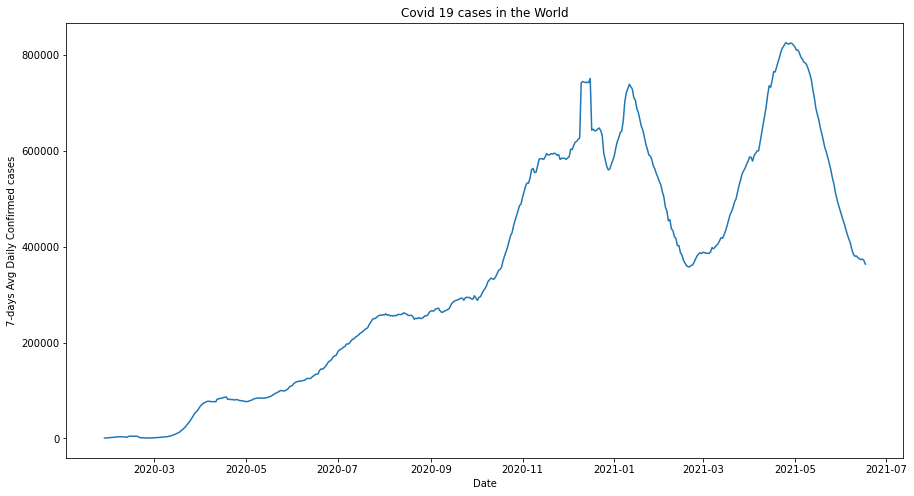

In [88]:
world_fig = plot_data(timeseries_df,"daily_confirmed",all_countries = True,smooth = True);
world_fig

### We can see that the wave strength is increasing over time.

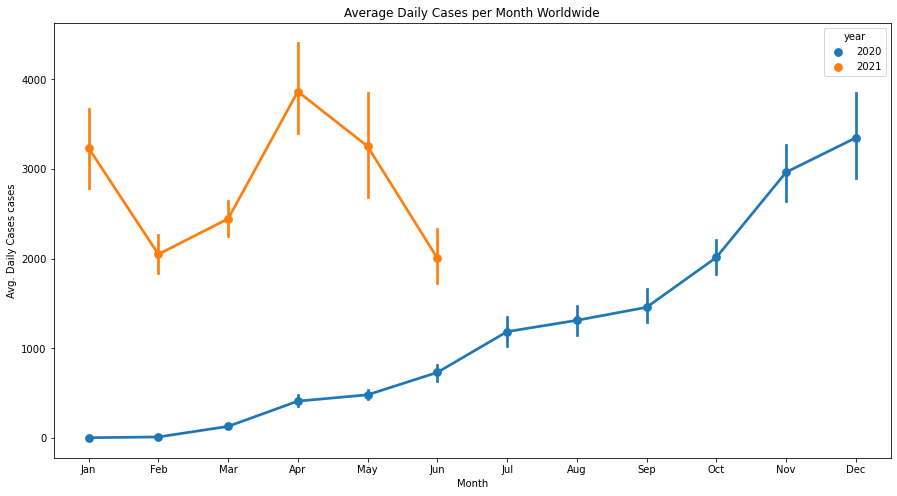

In [144]:
plt.subplots(figsize=(15,8))        
sns.pointplot(data=timeseries_df, x='month', y="daily_confirmed",hue = "year")
plt.title("Average Daily Cases per Month Worldwide")
plt.xlabel("Month")
plt.ylabel('Avg. Daily Cases cases');

### Here, the strongest wave came in june 2020.

# But for Egypt Daily the case is different

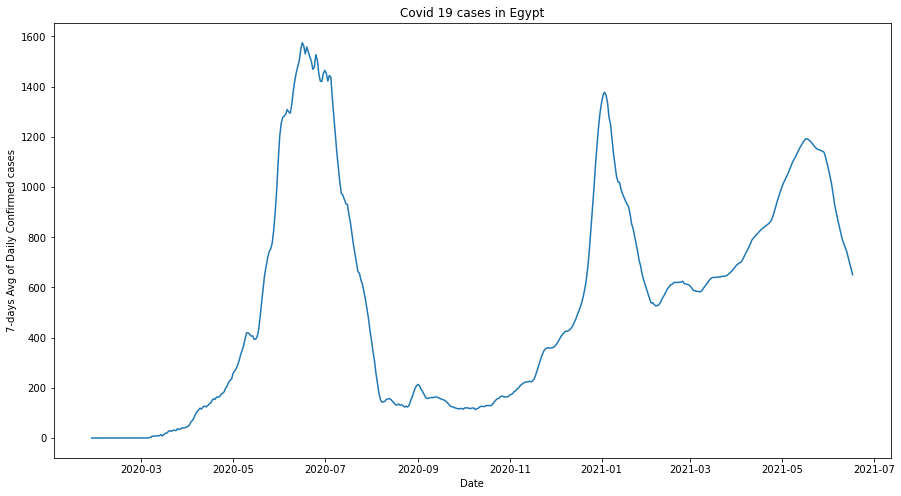

In [138]:
eg_fig = plot_data(timeseries_df,"daily_confirmed",country = "Egypt",all_countries = False,smooth = True)
eg_fig

### 1- Here, It is clear that wave strength is decreasing over time.

### 2- There is a reatitive wave started in about Feb 2020 , and also 2021.

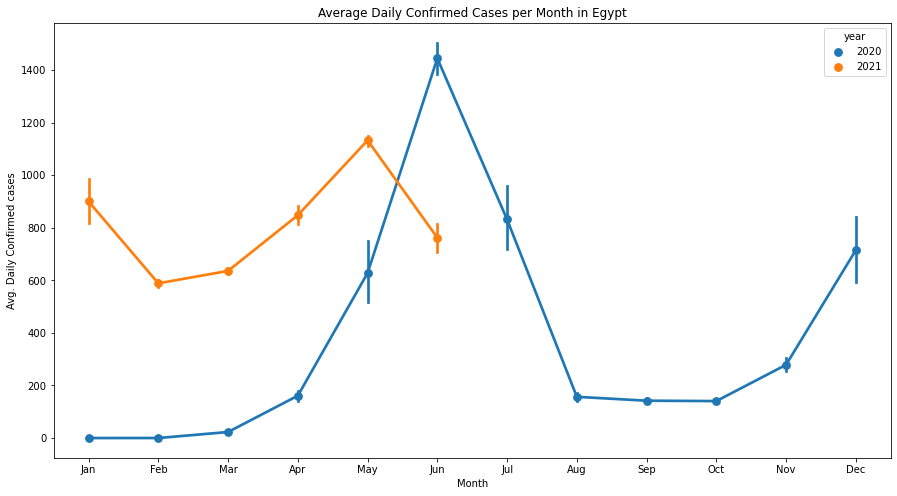

In [91]:
country_summary(timeseries_df,"Egypt","daily_confirmed")

### Strongest wave came in june 2020

# And for United States

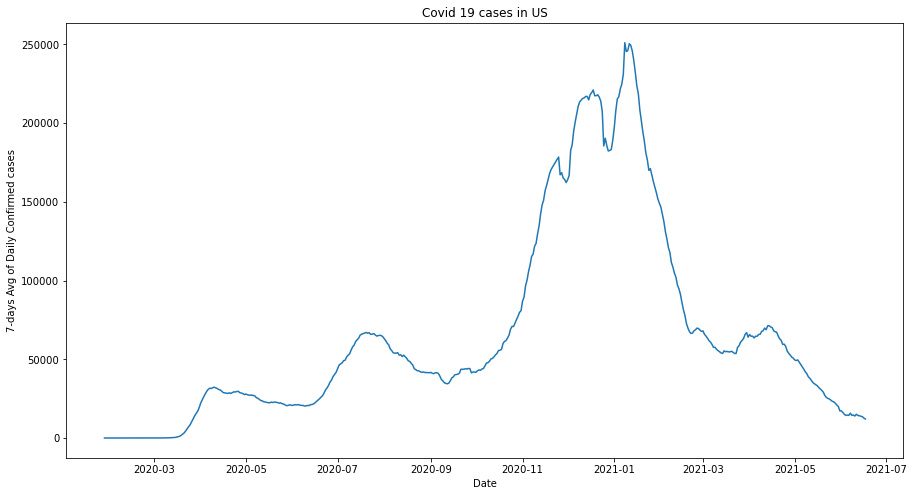

In [139]:
US_fig = plot_data(timeseries_df,"daily_confirmed",country = "US",all_countries = False,smooth = True)
US_fig

### Here, It is clear that wave strength is decreasing unlike worldwide curve.


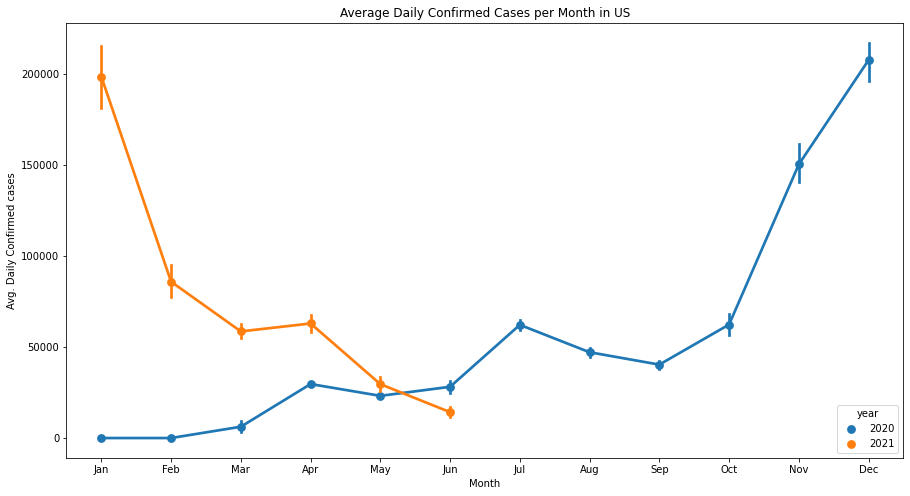

In [140]:
country_summary(timeseries_df,"US","daily_confirmed")

### Strongest wave came in Dec 2020 an Jan 2021

# And for Brazil

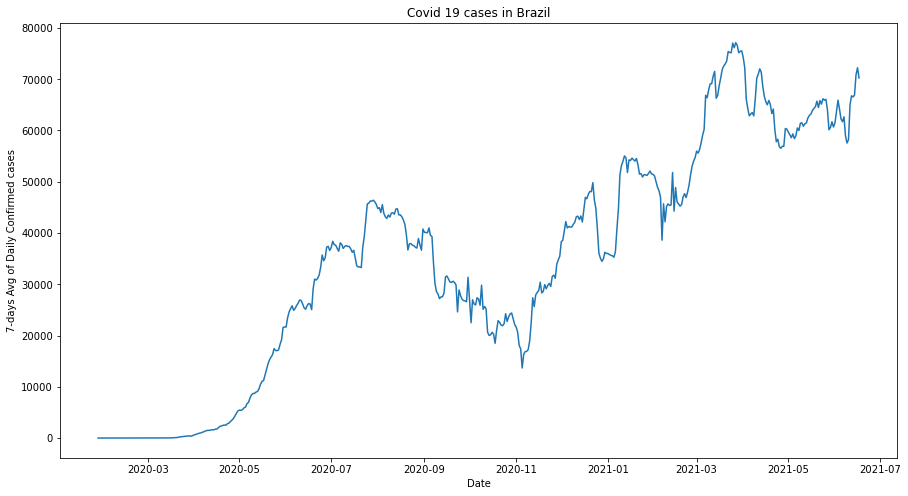

In [94]:
Brazil_fig = plot_data(timeseries_df,"daily_confirmed",country = "Brazil",all_countries = False,smooth = True)
Brazil_fig

### Here, the wave strength is getting stronger with time.


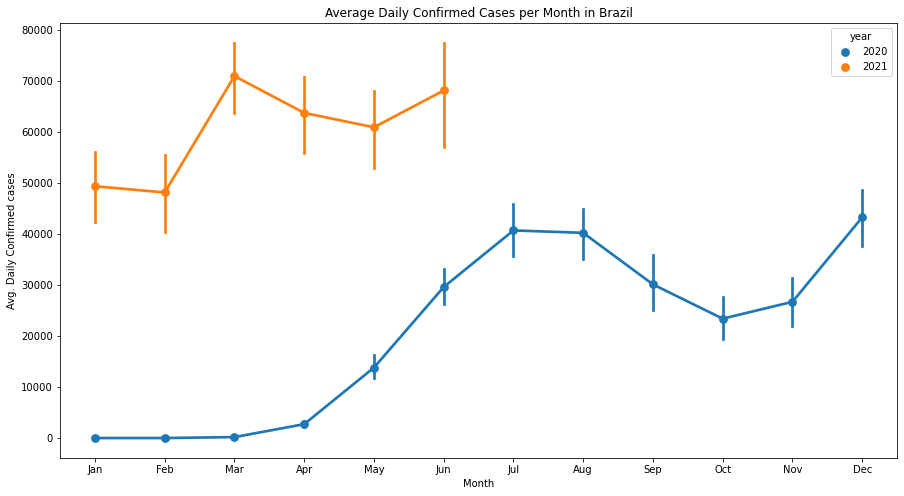

In [95]:
country_summary(timeseries_df,"Brazil","daily_confirmed")

### Strongest wave came in march 2021.

# Conclusions

<br> 1- It is clear that the occurrence time of waves and their strength are greatly different from one country to another. We definitly can't identify a pattern that all countries follow either in wave strength or time of occurrence. we can only find few details that some countries share.

<br> 2- Worldwide data may be misleading if it took alone as different countries has very different conditions.So, we can't generalize any insights from it.

<br> 3- Egypt shows a repetitive pattern of covid waves that starts between Feb and March. It happened in 2020 and also in 2021.



# Recommendation

Countries with repeatitive wave patterns should make great use of this. They should take proactive moves designing their future strategies about food imports,medcine, etc.. taking into consideration the reasonable likelihood of being hit by a wave on the next pattern.

<a id='research2'></a>

## How Can we rely on these data to make comparisons and extract conclusions?


By dividing this question to the following questions

* Do all countries have similar or close values for covid tests per million ratio?
* Does tests per million ratio affect number of cases per million discoverd or cases discoverd per million ratio is a constant ratio that isn't affected by test rates?
 

# we found that:
1- There is a wide gap of test rates between countries.

2- High test rates result in increase in daily cases per million ratio.

## We need to subdivide this question first

### 2.1 Do all countries have similar or close values for covid tests per million ratio?

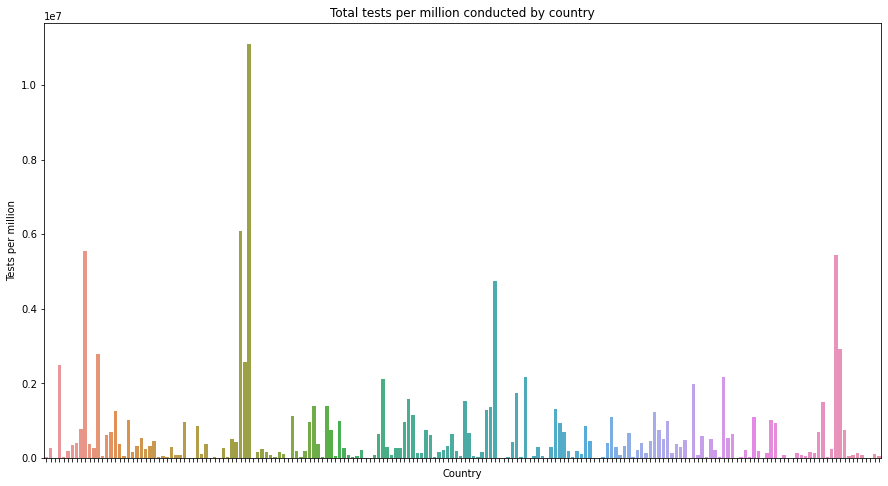

In [96]:
plt.figure(figsize=(15,8))

test = sns.barplot(data = parameter_df ,y = "total_tests_per_million",x =np.arange(194) )
test.set(xticklabels=[]);
test.set(title='Total tests per million conducted by country')
test.set(xlabel="Country",ylabel="Tests per million");

Here, We can see obviously that there is a wide gap of test rates between countries

### 2.2 Does tests per million ratio affect number of cases per million discoverd or cases discoverd per million ratio is a constant ratio that isn't affected by test rates?

## Plot Tests Per Million Vs. Average Daily Confirmed Cases Per Million

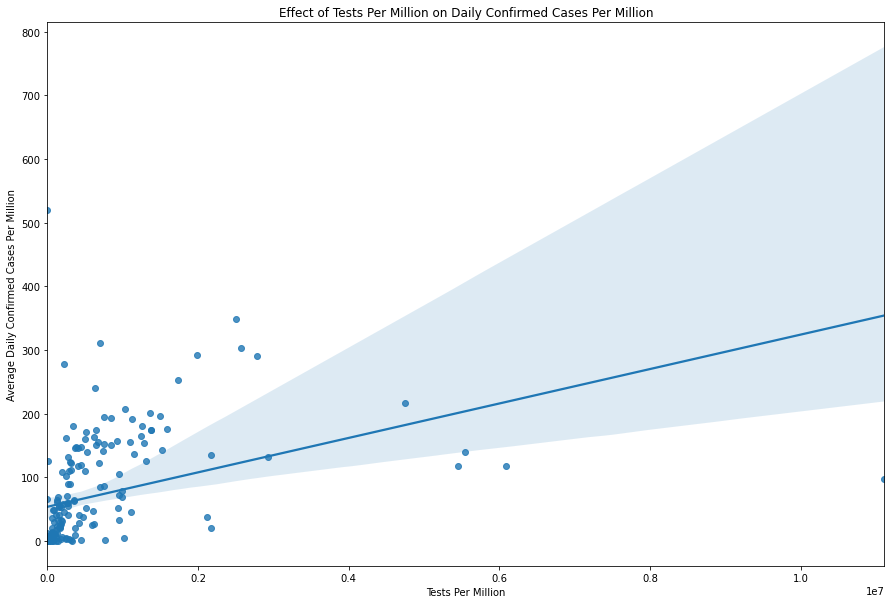

In [97]:
plt.figure(figsize=(15,10))

sns.regplot(y = "Average_daily_cases_per_million",x = "total_tests_per_million", data = parameter_df)
plt.ylabel("Average Daily Confirmed Cases Per Million")
plt.xlabel("Tests Per Million");
plt.title("Effect of Tests Per Million on Daily Confirmed Cases Per Million");

## We need first to exclude outliers to make more accurate conclusion 

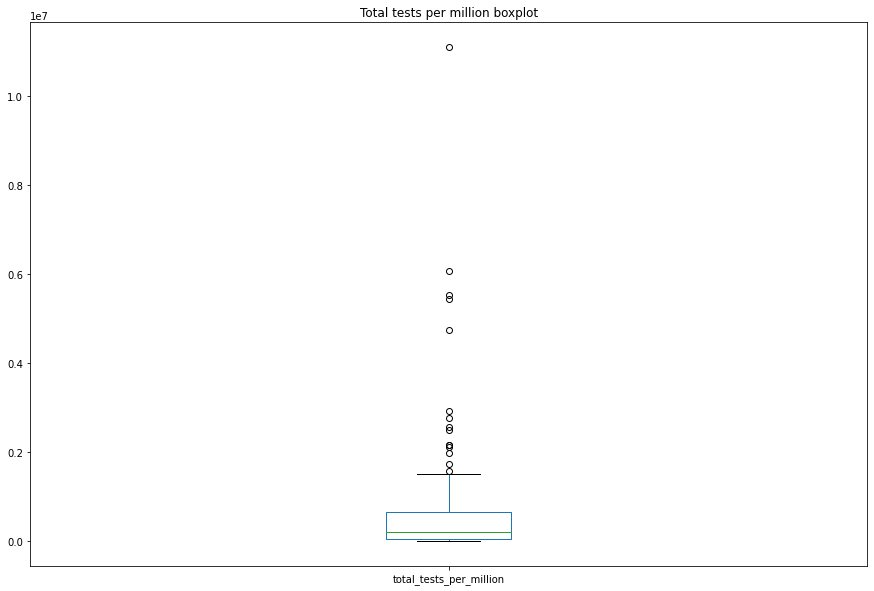

In [98]:
# plot Total tests per million boxplot
plt.figure(figsize=(15,10))
parameter_df["total_tests_per_million"].plot(kind = "box");
plt.title("Total tests per million boxplot");

In [99]:
#calculate upper_outlier_limit
Q1 =  np.percentile(parameter_df["total_tests_per_million"],25)
Q3 =  np.percentile(parameter_df["total_tests_per_million"],75)
IQR = Q3 -Q1
upper_outlier_limit = Q3 + 1.5*(IQR)
upper_outlier_limit

1570518.2694762493

In [100]:
#Get data without outliers
nooutlier_df = parameter_df[parameter_df["total_tests_per_million"]<1570518.375].reset_index(drop = True).copy()
nooutlier_df

,country,continent,income_level,test_per_million_level,median_age_level,pop_density_level,population,pop_density,median_age,total_tests_per_million,Average_daily_confirmed,Average_daily_recoverd,Average_daily_deaths,Average_daily_full_vaccinated,Average_daily_cases_per_million,Average_daily_full_vaccinated_per_million,Average_Deaths_to_confirmed_ratio
0,Afghanistan,Asia,Low income,Low,Low,Low,39770634.0,59.627,18.438,13893.115207,188.169591,122.218324,7.489279,345.547758,4.731370,8.688515,0.034584
1,Albania,Europe,Upper middle income,High,High,High,2874759.0,105.029,36.399,268638.171061,258.247563,253.206628,4.783626,685.093567,89.832770,238.313392,0.025465
2,Algeria,Africa,Lower middle income,Low,Low,Low,44612800.0,18.411,28.521,5174.770469,262.846004,182.906433,7.027290,0.000000,5.891717,0.000000,0.044140
3,Angola,Africa,Lower middle income,Low,Low,Low,33845950.0,26.363,16.677,17977.128726,72.688109,60.633528,1.658869,959.582846,2.147616,28.351482,0.038636
4,Antigua and Barbuda,North America,High income,Low,High,High,98711.0,222.564,33.976,169180.739735,2.461988,2.380117,0.081871,47.417154,24.941377,480.363425,0.042841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Vietnam,Asia,Lower middle income,Low,High,High,98183253.0,291.000,30.500,63986.645462,23.684211,9.070175,0.118908,175.113060,0.241225,1.783533,0.012815
175,West Bank and Gaza,Asia,Lower middle income,Low,Low,High,4817000.0,654.000,19.100,7790.948723,608.838207,594.941520,6.910331,0.000000,126.393649,0.000000,0.008184
176,Yemen,Asia,Lower middle income,Low,Low,Low,30457162.0,56.492,20.221,3022.343316,13.389864,7.485380,2.633528,0.000000,0.439629,0.000000,0.244270
177,Zambia,Africa,Lower middle income,Low,Low,Low,18877782.0,24.730,17.592,92780.550173,238.292398,198.606238,2.972710,12.115010,12.622902,0.641760,0.018326


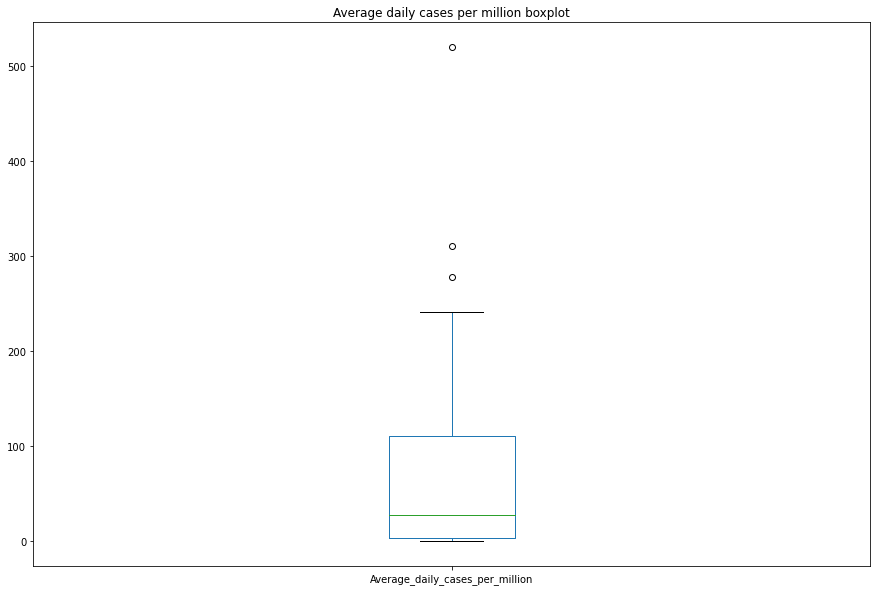

In [101]:
plt.figure(figsize=(15,10))
nooutlier_df["Average_daily_cases_per_million"].plot(kind = "box");
plt.title("Average daily cases per million boxplot");

In [102]:
Q1 = np.percentile(nooutlier_df["Average_daily_cases_per_million"],25)
Q3 = np.percentile(nooutlier_df["Average_daily_cases_per_million"],75)
IQR = Q3 -Q1
upper_outlier_limit = Q3 + 1.5*(IQR)
upper_outlier_limit

270.57073872801294

In [103]:
nooutlier_df = nooutlier_df[nooutlier_df["Average_daily_cases_per_million"]<upper_outlier_limit]

## Plot Tests Per Million Vs. Average Daily Confirmed Cases Per Million

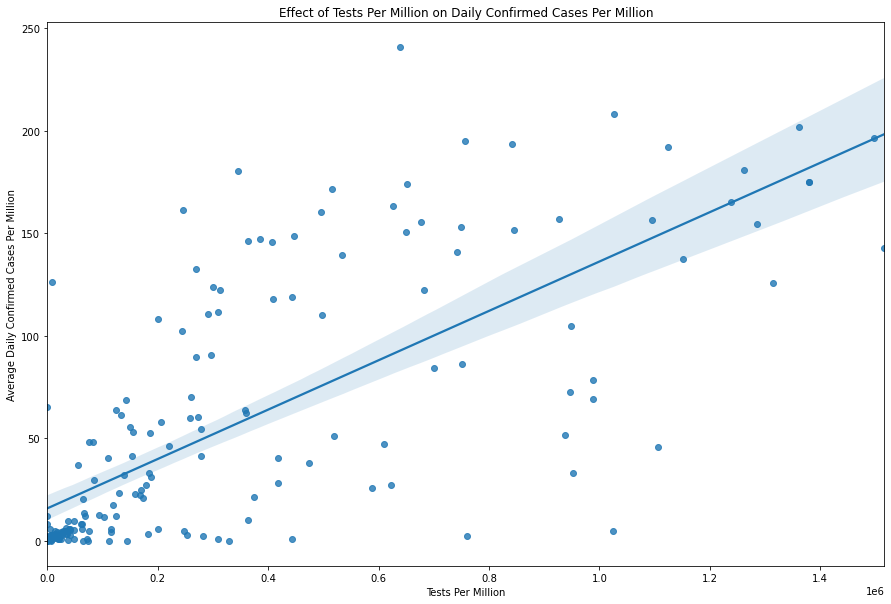

In [104]:
plt.figure(figsize=(15,10))
sns.regplot(y = "Average_daily_cases_per_million",x = "total_tests_per_million", data = nooutlier_df)
plt.ylabel("Average Daily Confirmed Cases Per Million")
plt.xlabel("Tests Per Million");
plt.title("Effect of Tests Per Million on Daily Confirmed Cases Per Million");

And here we can see that Tests Per Million and Average Daily Confirmed Cases Per Million are directly proportional. So, high test rates result in more new cases discovery.

## Finally, we can see the effect clearly here 

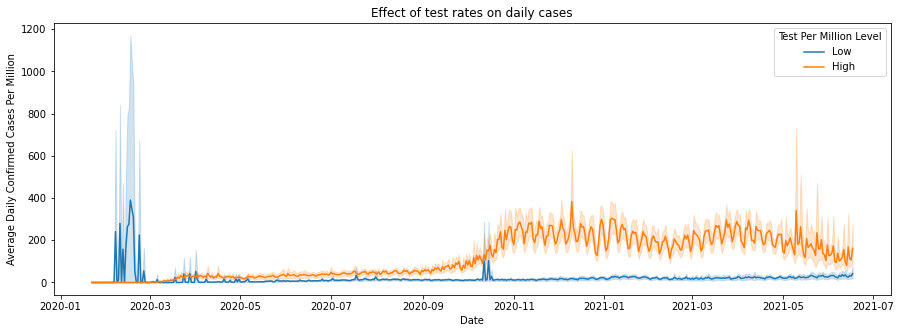

In [142]:
plt.figure(figsize=(15,5))
sns.lineplot(data=timeseries_df,x="date",y="daily_cases_per_million",hue = "test_per_million_level")
plt.legend(title = "Test Per Million Level");
plt.ylabel("Average Daily Confirmed Cases Per Million")
plt.xlabel("Date");
plt.title("Effect of test rates on daily cases");

# Conclusion
It is so clear that high test rates result in increase in daily cases per million ratio. 
 

# Recommendation

we need to split our investigation of any parameter effect on daily cases into 2 levels.

1- Effect of the parameter on daily cases for high test rates

2- Effect of the parameter on daily cases  for low test rates

So as not to get inaccurate observation due to interference between the parameter effect and high test rate effect.
Finally, we can rely on the Effect of the parameter on daily cases for high test rates as the higher test rates, the more accurate data will be.

<a id='research3'></a>

# What is the effect of Population density on daily cases?

# we found that:
1- For low test rates, it seems that Population density  has no effect on daily cases.

2- For high test rates we can see an increase in average daily cases per million for high population density.

### 1- Get rid of outliers first

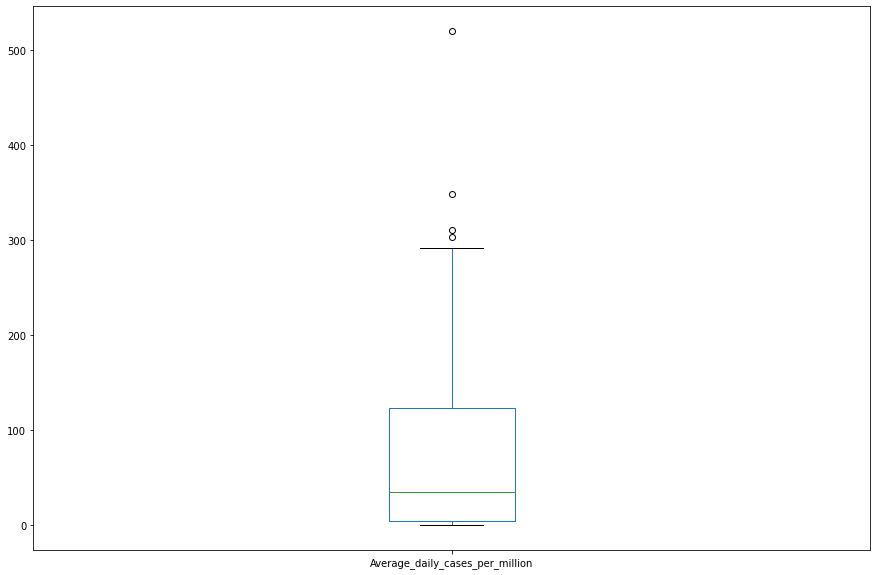

In [106]:
plt.figure(figsize=(15,10))
parameter_df["Average_daily_cases_per_million"].plot(kind = "box");

In [107]:
Q1 = np.percentile(parameter_df["Average_daily_cases_per_million"],25)
Q3 = np.percentile(parameter_df["Average_daily_cases_per_million"],75)
IQR = Q3 -Q1
upper_outlier_limit = Q3 + 1.5*(IQR)
upper_outlier_limit

302.4824030878897

In [108]:
nooutliers_df = parameter_df[parameter_df["Average_daily_cases_per_million"]<upper_outlier_limit].reset_index(drop = True)
nooutliers_df

,country,continent,income_level,test_per_million_level,median_age_level,pop_density_level,population,pop_density,median_age,total_tests_per_million,Average_daily_confirmed,Average_daily_recoverd,Average_daily_deaths,Average_daily_full_vaccinated,Average_daily_cases_per_million,Average_daily_full_vaccinated_per_million,Average_Deaths_to_confirmed_ratio
0,Afghanistan,Asia,Low income,Low,Low,Low,39770634.0,59.627,18.438,13893.115207,188.169591,122.218324,7.489279,345.547758,4.731370,8.688515,0.034584
1,Albania,Europe,Upper middle income,High,High,High,2874759.0,105.029,36.399,268638.171061,258.247563,253.206628,4.783626,685.093567,89.832770,238.313392,0.025465
2,Algeria,Africa,Lower middle income,Low,Low,Low,44612800.0,18.411,28.521,5174.770469,262.846004,182.906433,7.027290,0.000000,5.891717,0.000000,0.044140
3,Angola,Africa,Lower middle income,Low,Low,Low,33845950.0,26.363,16.677,17977.128726,72.688109,60.633528,1.658869,959.582846,2.147616,28.351482,0.038636
4,Antigua and Barbuda,North America,High income,Low,High,High,98711.0,222.564,33.976,169180.739735,2.461988,2.380117,0.081871,47.417154,24.941377,480.363425,0.042841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Vietnam,Asia,Lower middle income,Low,High,High,98183253.0,291.000,30.500,63986.645462,23.684211,9.070175,0.118908,175.113060,0.241225,1.783533,0.012815
186,West Bank and Gaza,Asia,Lower middle income,Low,Low,High,4817000.0,654.000,19.100,7790.948723,608.838207,594.941520,6.910331,0.000000,126.393649,0.000000,0.008184
187,Yemen,Asia,Lower middle income,Low,Low,Low,30457162.0,56.492,20.221,3022.343316,13.389864,7.485380,2.633528,0.000000,0.439629,0.000000,0.244270
188,Zambia,Africa,Lower middle income,Low,Low,Low,18877782.0,24.730,17.592,92780.550173,238.292398,198.606238,2.972710,12.115010,12.622902,0.641760,0.018326


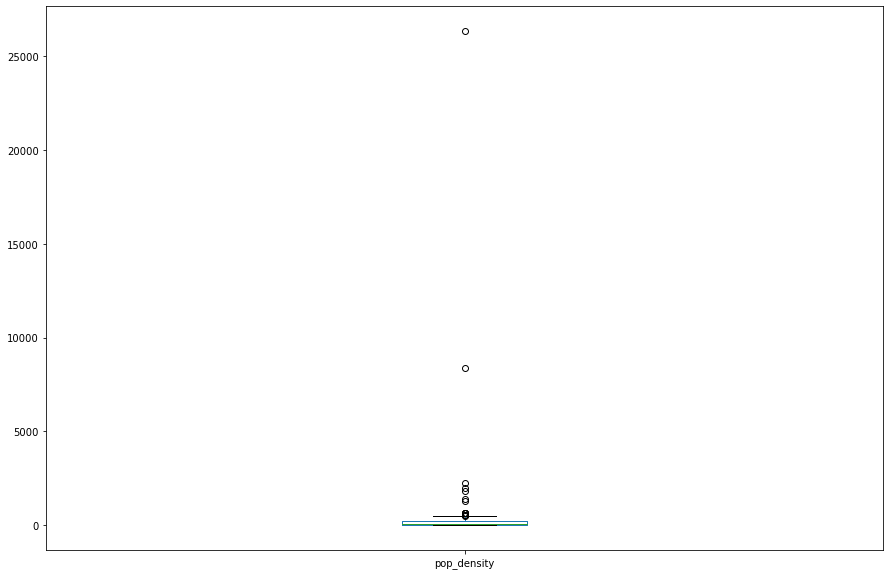

In [109]:
plt.figure(figsize=(15,10))

nooutliers_df["pop_density"].plot(kind = "box");

In [110]:
Q1 =  np.percentile(nooutliers_df["pop_density"],25)
Q3 = np.percentile(nooutliers_df["pop_density"],75)
IQR = Q3 -Q1
upper_outlier_limit = Q3 + 1.5*(IQR)
upper_outlier_limit

477.87962499999725

In [111]:
nooutliers_df = nooutliers_df[nooutliers_df["pop_density"]<upper_outlier_limit].reset_index(drop = True)
nooutliers_df

,country,continent,income_level,test_per_million_level,median_age_level,pop_density_level,population,pop_density,median_age,total_tests_per_million,Average_daily_confirmed,Average_daily_recoverd,Average_daily_deaths,Average_daily_full_vaccinated,Average_daily_cases_per_million,Average_daily_full_vaccinated_per_million,Average_Deaths_to_confirmed_ratio
0,Afghanistan,Asia,Low income,Low,Low,Low,39770634.0,59.627,18.438,13893.115207,188.169591,122.218324,7.489279,345.547758,4.731370,8.688515,0.034584
1,Albania,Europe,Upper middle income,High,High,High,2874759.0,105.029,36.399,268638.171061,258.247563,253.206628,4.783626,685.093567,89.832770,238.313392,0.025465
2,Algeria,Africa,Lower middle income,Low,Low,Low,44612800.0,18.411,28.521,5174.770469,262.846004,182.906433,7.027290,0.000000,5.891717,0.000000,0.044140
3,Angola,Africa,Lower middle income,Low,Low,Low,33845950.0,26.363,16.677,17977.128726,72.688109,60.633528,1.658869,959.582846,2.147616,28.351482,0.038636
4,Antigua and Barbuda,North America,High income,Low,High,High,98711.0,222.564,33.976,169180.739735,2.461988,2.380117,0.081871,47.417154,24.941377,480.363425,0.042841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Venezuela,South America,Lower middle income,Low,Low,Low,28358019.0,32.238,29.600,118450.234482,500.705653,461.955166,5.664717,296.093567,17.656581,10.441264,0.012480
170,Vietnam,Asia,Lower middle income,Low,High,High,98183253.0,291.000,30.500,63986.645462,23.684211,9.070175,0.118908,175.113060,0.241225,1.783533,0.012815
171,Yemen,Asia,Lower middle income,Low,Low,Low,30457162.0,56.492,20.221,3022.343316,13.389864,7.485380,2.633528,0.000000,0.439629,0.000000,0.244270
172,Zambia,Africa,Lower middle income,Low,Low,Low,18877782.0,24.730,17.592,92780.550173,238.292398,198.606238,2.972710,12.115010,12.622902,0.641760,0.018326


### We can see this clearly here

<ipython-input-112-45a50bbecf09>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels());


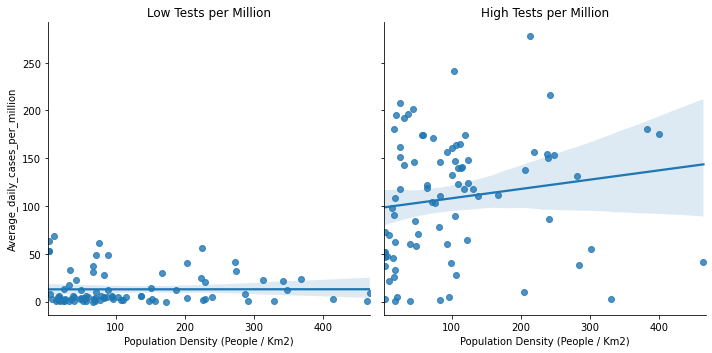

In [112]:
g = sns.FacetGrid(nooutliers_df, col="test_per_million_level", height=5, aspect=1,
                  sharey=True)
g.map(sns.regplot, "pop_density", "Average_daily_cases_per_million" )
for ax, title in zip(g.axes.flat, ['Low Tests per Million', 'High Tests per Million']):
    ax.set_title(title)
for ax, xlabel in zip(g.axes.flat, ['Low Tests per Million', 'High Tests per Million']):
    ax.set_xlabel("Population Density (People / Km2)")
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels());

# Timeseries observation

<ipython-input-113-a810d1b0c5db>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


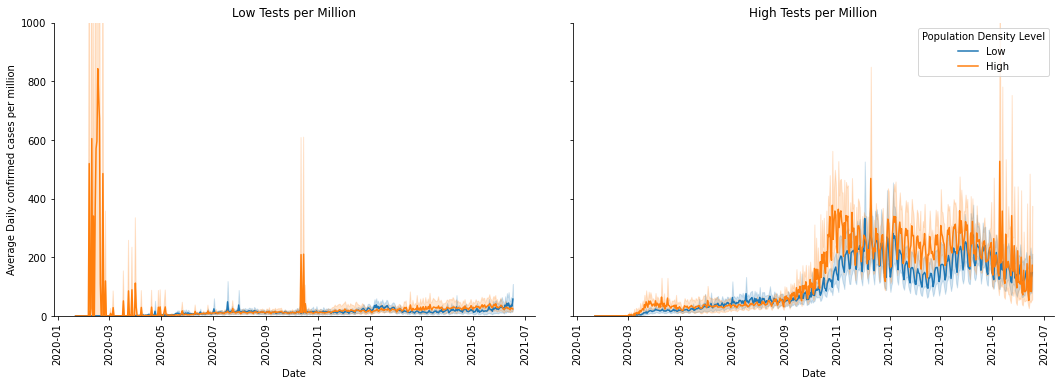

In [113]:
g = sns.FacetGrid(timeseries_df, col="test_per_million_level",hue ="pop_density_level", height=5, aspect=1.5,
                  sharey=True)
g.map(sns.lineplot, "date", "daily_cases_per_million" )
plt.legend(title = "Population Density Level")

for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
    ax.set_ylim(0,1000);
for ax, title in zip(g.axes.flat, ['Low Tests per Million', 'High Tests per Million']):
    ax.set_title(title)
for ax, xlabel in zip(g.axes.flat, ['Low Tests per Million', 'High Tests per Million']):
    ax.set_xlabel("Date")
    ax.set_ylabel("Average Daily confirmed cases per million")

# Observations
1- For low test rates it seems to have no effect.

2- For high test rates we can see an increase in average daily cases per million for high population density.

<a id='research4'></a>

# What is the effect of median age on daily cases?

# we found that:
For both low test rates and high test rates we can see an increase in average daily cases per million with increasing median age but it is more clear for high test rates.

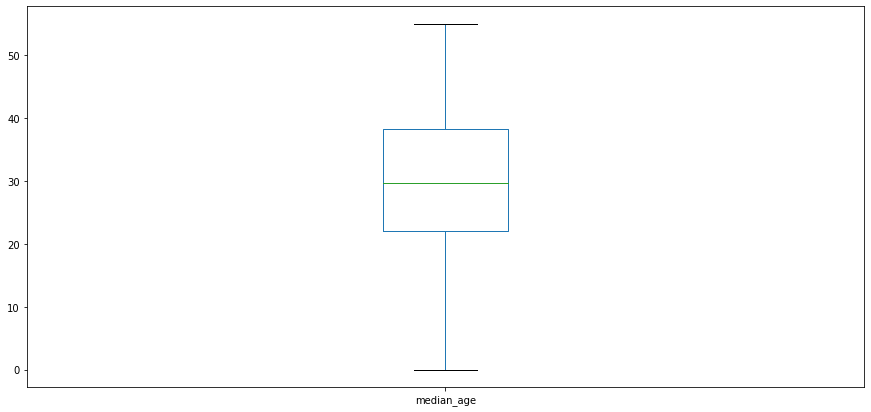

In [114]:
plt.figure(figsize=(15,7))
parameter_df["median_age"].plot(kind = "box");

In [115]:
parameter_df["median_age"].describe()

count    194.000000
mean      30.310169
std        9.482776
min        0.000000
25%       21.960000
50%       29.710500
75%       38.298000
max       55.000000
Name: median_age, dtype: float64

### We got wrong value of zero as min, lets investigate this.

In [116]:
parameter_df.sort_values(by = "median_age")

,country,continent,income_level,test_per_million_level,median_age_level,pop_density_level,population,pop_density,median_age,total_tests_per_million,Average_daily_confirmed,Average_daily_recoverd,Average_daily_deaths,Average_daily_full_vaccinated,Average_daily_cases_per_million,Average_daily_full_vaccinated_per_million,Average_Deaths_to_confirmed_ratio
105,MS Zaandam,ship,Low income,Low,Low,High,1432.0,187.181,0.000,0.000000e+00,0.017544,0.013645,0.003899,0.000000,12.251299,0.000000,0.220234
128,Niger,Africa,Low income,Low,Low,Low,25045000.0,19.110,15.151,4.547375e+03,10.637427,10.093567,0.376218,0.000000,0.424733,0.000000,0.047441
110,Mali,Africa,Low income,Low,Low,Low,20810156.0,16.596,16.347,1.491599e+04,28.000000,19.495127,1.019493,82.146199,1.345497,3.947409,0.044564
34,Chad,Africa,Low income,Low,Low,Low,16877855.0,13.045,16.554,7.327412e+03,9.637427,9.294347,0.339181,0.000000,0.571010,0.000000,0.054227
4,Angola,Africa,Lower middle income,Low,Low,Low,33845950.0,26.363,16.677,1.797713e+04,72.688109,60.633528,1.658869,959.582846,2.147616,28.351482,0.038636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Portugal,Europe,High income,High,High,High,10167955.0,111.330,46.158,1.238997e+06,1679.586745,1594.062378,33.249513,4904.672515,165.184321,482.365679,0.024496
3,Andorra,Europe,High income,High,High,High,77384.0,164.394,46.200,2.501745e+06,26.976608,26.588694,0.247563,32.000000,348.607053,413.522175,0.027189
85,Italy,Europe,High income,High,High,High,60375868.0,205.555,47.288,1.151382e+06,8284.122807,7843.970760,247.933723,29237.444444,137.209171,484.257128,0.075426
87,Japan,Asia,High income,Low,High,High,126101993.0,346.934,48.358,1.244893e+05,1522.886940,1442.606238,27.830409,15836.284600,12.076629,125.583143,0.023058


In [117]:
# replace wrong value with nan.
parameter_df["median_age"].replace(0,np.nan,inplace = True)

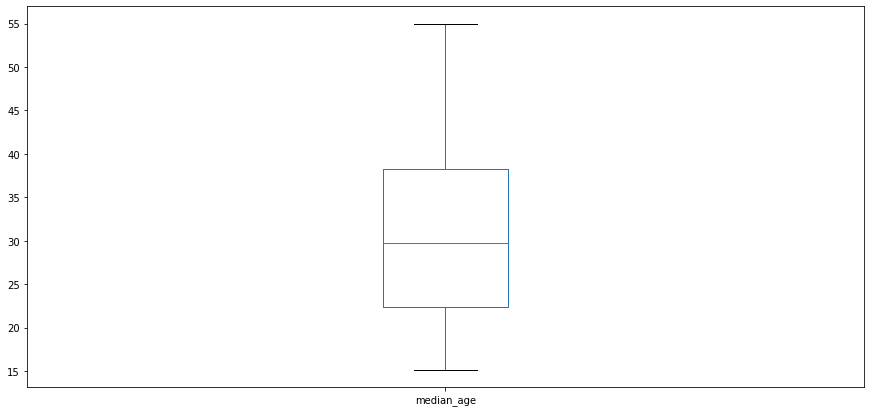

In [118]:
#check
plt.figure(figsize=(15,7))
parameter_df["median_age"].plot(kind = "box");

### Right values with no outliers

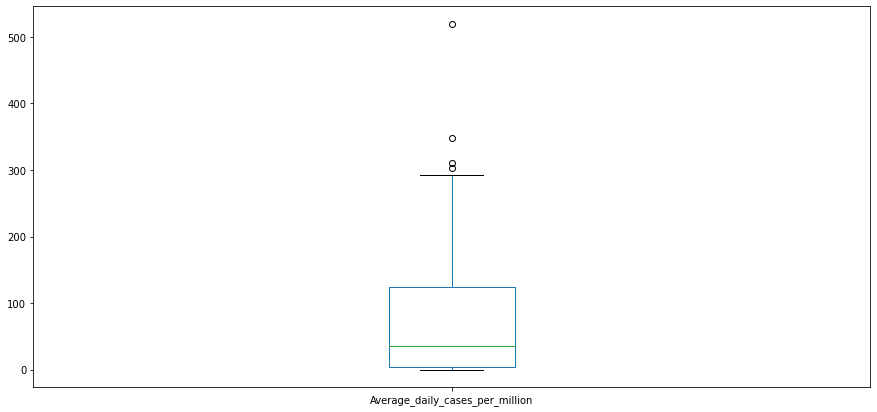

In [119]:
# Average_daily_cases_per_million check
plt.figure(figsize=(15,7))
parameter_df["Average_daily_cases_per_million"].plot(kind = "box");

In [120]:
Q1 = np.percentile(parameter_df["Average_daily_cases_per_million"],25)
Q3 = np.percentile(parameter_df["Average_daily_cases_per_million"],75)
IQR = Q3 -Q1
upper_outlier_limit = Q3 + 1.5*(IQR)
upper_outlier_limit

302.4824030878897

In [121]:
nooutliers_df = parameter_df[parameter_df["Average_daily_cases_per_million"]<upper_outlier_limit].reset_index(drop = True)
nooutliers_df

,country,continent,income_level,test_per_million_level,median_age_level,pop_density_level,population,pop_density,median_age,total_tests_per_million,Average_daily_confirmed,Average_daily_recoverd,Average_daily_deaths,Average_daily_full_vaccinated,Average_daily_cases_per_million,Average_daily_full_vaccinated_per_million,Average_Deaths_to_confirmed_ratio
0,Afghanistan,Asia,Low income,Low,Low,Low,39770634.0,59.627,18.438,13893.115207,188.169591,122.218324,7.489279,345.547758,4.731370,8.688515,0.034584
1,Albania,Europe,Upper middle income,High,High,High,2874759.0,105.029,36.399,268638.171061,258.247563,253.206628,4.783626,685.093567,89.832770,238.313392,0.025465
2,Algeria,Africa,Lower middle income,Low,Low,Low,44612800.0,18.411,28.521,5174.770469,262.846004,182.906433,7.027290,0.000000,5.891717,0.000000,0.044140
3,Angola,Africa,Lower middle income,Low,Low,Low,33845950.0,26.363,16.677,17977.128726,72.688109,60.633528,1.658869,959.582846,2.147616,28.351482,0.038636
4,Antigua and Barbuda,North America,High income,Low,High,High,98711.0,222.564,33.976,169180.739735,2.461988,2.380117,0.081871,47.417154,24.941377,480.363425,0.042841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Vietnam,Asia,Lower middle income,Low,High,High,98183253.0,291.000,30.500,63986.645462,23.684211,9.070175,0.118908,175.113060,0.241225,1.783533,0.012815
186,West Bank and Gaza,Asia,Lower middle income,Low,Low,High,4817000.0,654.000,19.100,7790.948723,608.838207,594.941520,6.910331,0.000000,126.393649,0.000000,0.008184
187,Yemen,Asia,Lower middle income,Low,Low,Low,30457162.0,56.492,20.221,3022.343316,13.389864,7.485380,2.633528,0.000000,0.439629,0.000000,0.244270
188,Zambia,Africa,Lower middle income,Low,Low,Low,18877782.0,24.730,17.592,92780.550173,238.292398,198.606238,2.972710,12.115010,12.622902,0.641760,0.018326


# We can see this clearly here

<ipython-input-122-c846ecd63822>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels());


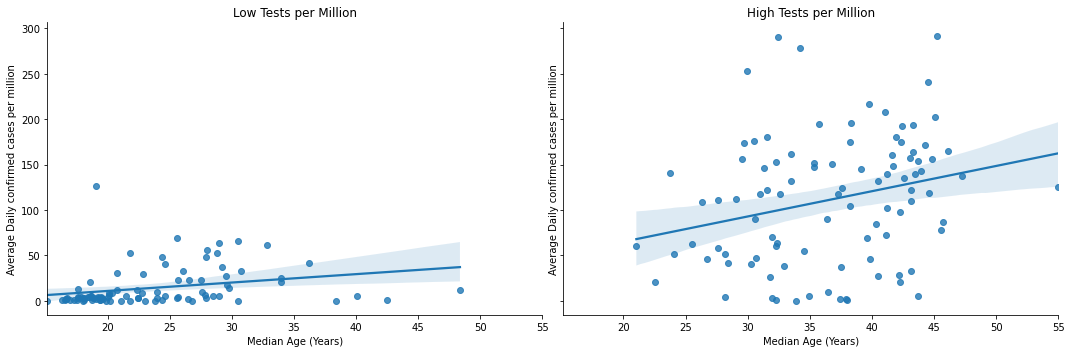

In [122]:
g = sns.FacetGrid(nooutliers_df, col="test_per_million_level", height=5, aspect=1.5,
                  sharey=True)
g.map(sns.regplot, "median_age", "Average_daily_cases_per_million" )
for ax, title in zip(g.axes.flat, ['Low Tests per Million', 'High Tests per Million']):
    ax.set_title(title)
for ax, xlabel in zip(g.axes.flat, ['Low Tests per Million', 'High Tests per Million']):
    ax.set_xlabel("Median Age (Years)")
    ax.set_ylabel("Average Daily confirmed cases per million")
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels());

# Timeseries observation

<ipython-input-123-36914bb646c8>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


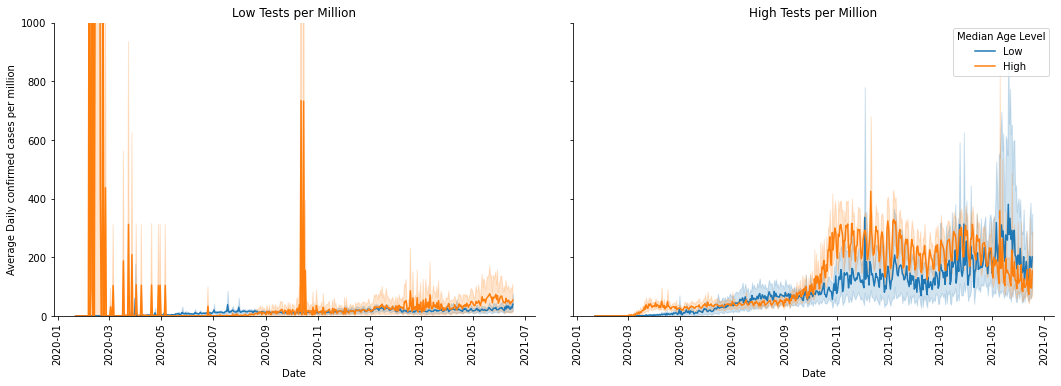

In [123]:
g = sns.FacetGrid(timeseries_df, col="test_per_million_level",hue ="median_age_level", height=5, aspect=1.5,
                  sharey=True)
g.map(sns.lineplot, "date", "daily_cases_per_million" )
plt.legend(title = "Median Age Level")
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylim(0,1000);
for ax, title in zip(g.axes.flat, ['Low Tests per Million', 'High Tests per Million']):
    ax.set_title(title)
for ax, xlabel in zip(g.axes.flat, ['Low Tests per Million', 'High Tests per Million']):
    ax.set_xlabel("Date")
    ax.set_ylabel("Average Daily confirmed cases per million")

# Observation
1- For both low test rates and high test rates we can see an increase in average daily cases per million with increasing median age but it is more clear for high test rates.

<a id='summary'></a>

# Now, Lets Combine the effect of Median age  with population density

### What is the effect of Median age on daily cases per million for different population density levels?

# we found that:
1- As concluded before high test rates results in more cases discovery than low test rates.

2- Countries with higher median age are experiencing higher number of cases. This can be shown for either high and low test rates but the effect is not so big for high population density countries with high test rates.

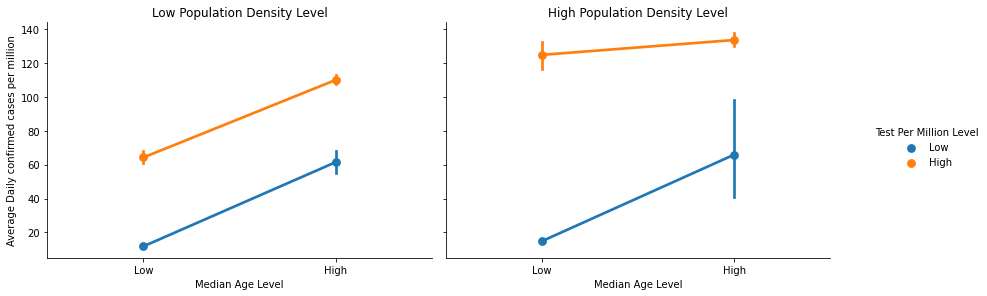

In [143]:
g = sns.catplot(col = "pop_density_level",
            y = "daily_cases_per_million",
            hue= "test_per_million_level",
            x= "median_age_level",
            data = timeseries_df,
            kind = "point",
            split = True,
           margin_titles=True,height=4,aspect=1.5);
g.set_ylabels('Average Daily confirmed cases per million', fontsize=10);
g.set_xlabels('Median Age Level', fontsize=10);
g._legend.set_title("Test Per Million Level");
for ax, title in zip(g.axes.flat, ['Low Population Density Level', 'High Population Density Level']):
    ax.set_title(title)

# Observation

1- As concluded before high test rates results in more cases discovery than low test rates.

2- Countries with higher median age are experiencing higher number of cases. This can be shown for either high and low test rates but the effect is not so big for high population density countries with high test rates.

### What is the effect of population density on daily cases per million for different  Median age levels?

# we found that:

1- Again and as concluded before high test rates results in more cases discovery than low test rates.

2- Countries with high test rates are experiencing high number of cases with increasing population density.

3 - For Countries with low test rates:

a) With low median age level: there is no difference shown.
b) With high median age level: there is nearly no difference in average cases but the variance of number of      cases for high population density cases is grater.

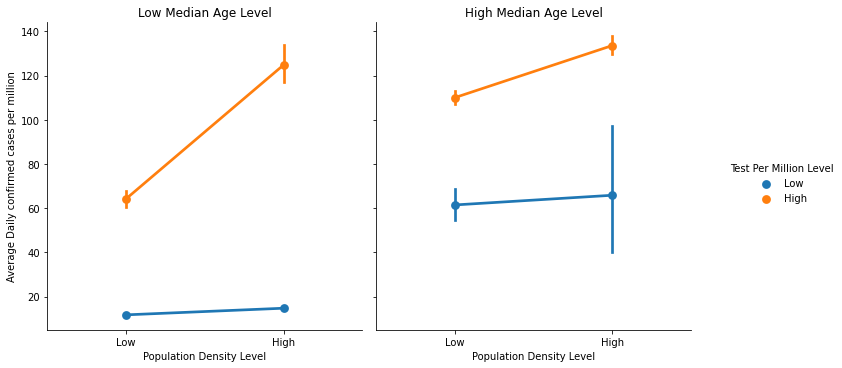

In [125]:
g = sns.catplot(x = "pop_density_level",
            y = "daily_cases_per_million",
            hue= "test_per_million_level",
            col= "median_age_level",
            data = timeseries_df,
            kind = "point",
           split = True,
           margin_titles=True);
g.set_ylabels('Average Daily confirmed cases per million', fontsize=10);
g.set_xlabels('Population Density Level', fontsize=10);
g._legend.set_title("Test Per Million Level");
for ax, title in zip(g.axes.flat, ['Low Median Age Level', 'High Median Age Level']):
    ax.set_title(title)

# Observation

1- Again and as concluded before high test rates results in more cases discovery than low test rates.

2- Countries with high test rates are experiencing high number of cases with increasing population density. 

3 - For Countries with low test rates:

    a) With low median age level: there is no difference shown.
    b) With high median age level: there is nearly no difference in average cases but the variance of number of      cases for high population density cases is grater. 

# What is the effect of  Poulation density and Median age on daily deaths per million?

## 1 - Median age

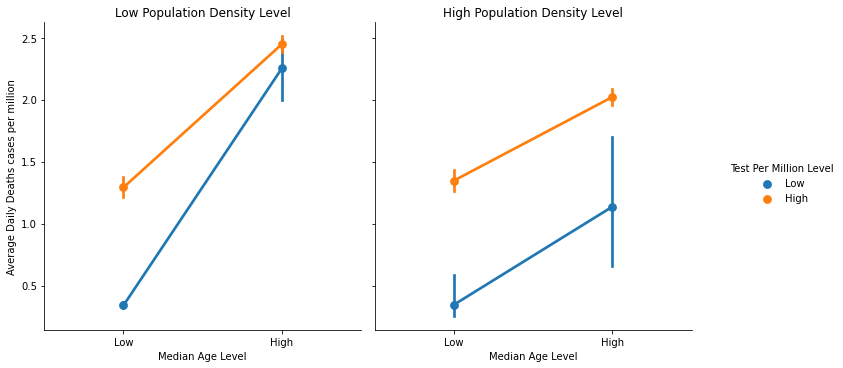

In [126]:
g = sns.catplot(x = "median_age_level",
            y = "daily_deaths_per_million",
            hue= "test_per_million_level",
            col = "pop_density_level",
            data = timeseries_df,
            kind = "point",
            split = False,
           margin_titles=True,);
g.set_ylabels('Average Daily Deaths cases per million', fontsize=10);
g.set_xlabels('Median Age Level', fontsize=10);
g._legend.set_title("Test Per Million Level");
for ax, title in zip(g.axes.flat, ['Low Population Density Level', 'High Population Density Level']):
    ax.set_title(title)

# Observation

1- Countries with high Median age experience higher deaths rates under all conditions.

## 2- Population Density

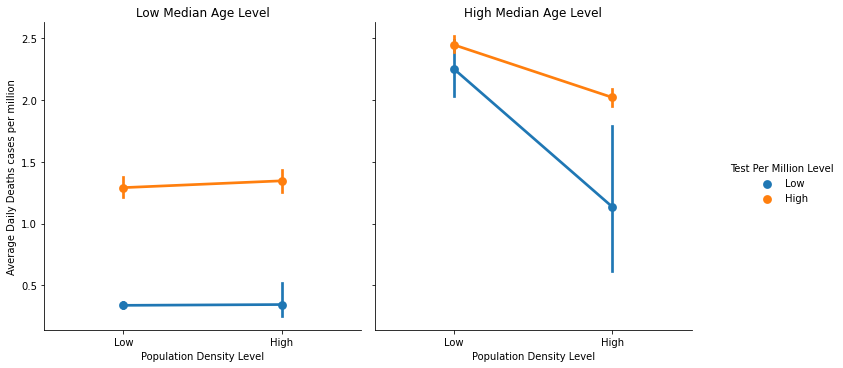

In [127]:
g = sns.catplot(x = "pop_density_level",
            y = "daily_deaths_per_million",
            hue= "test_per_million_level",
            col = "median_age_level",
            data = timeseries_df,
            kind = "point",
            split = False,
           margin_titles=True,
        );
g.set_ylabels('Average Daily Deaths cases per million', fontsize=10);
g.set_xlabels('Population Density Level', fontsize=10);
g._legend.set_title("Test Per Million Level");
for ax, title in zip(g.axes.flat, ['Low Median Age Level', 'High Median Age Level']):
    ax.set_title(title)

# Observation

1 - Countries with low Median age have about the same deaths per million ratio for both population density level.

2 - For Countries with high Median we can see that  deaths per million are inversly proportional to population density for both test rates.

<a id='research5'></a>

# What is the effect of Income Level on daily cases?


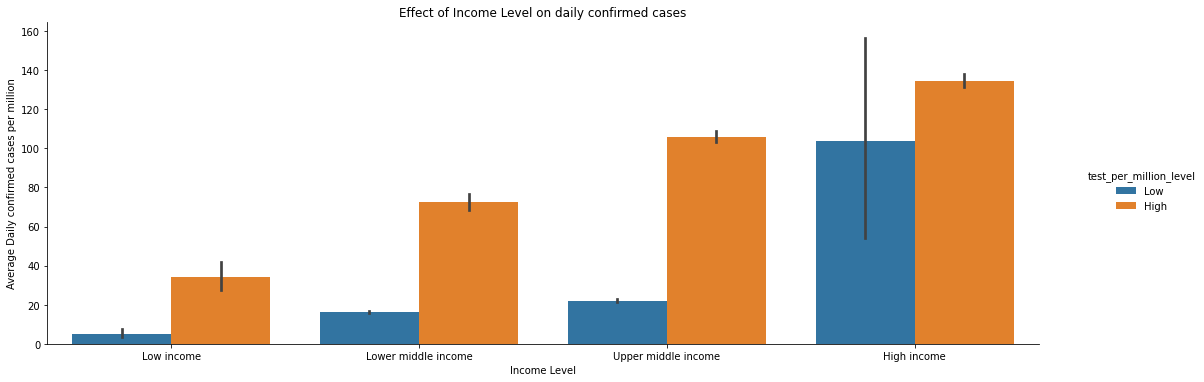

In [128]:
sns.catplot(x = "income_level",
            y = "daily_cases_per_million",
            hue= "test_per_million_level",
            data = timeseries_df,
            kind = "bar",
#             split = False,
           margin_titles=True,
           height=5, aspect=3,order = ['Low income','Lower middle income','Upper middle income','High income']);
plt.ylabel("Average Daily confirmed cases per million");
plt.xlabel("Income Level")
plt.title("Effect of Income Level on daily confirmed cases");


# Observation

1 - Under all conditions, we can see the higher the income the higher the cases per million.

<a id='research6'></a>

# What is the effect of Continent on daily cases?

# We found that

1 - Even Africa has lower cases per million and deaths per million but has the second highest deaths to confirmed ratio. This can reflect the heath care system of Africa.

2- South America is the most suffering continent with highest cummulative cases, deaths and deaths to confirmed ratio.

3- Europe and North America reflect better heath care systems comparing their death to confirmed ratios with their very high cases per million.

In [129]:
# step1: Create continent_df that contain total deaths ,confirmed cases and cummulative population of each continent
continent_df = timeseries_df.groupby("continent",as_index = False).sum()[["continent","daily_deaths","daily_confirmed","population"]].drop(6)

#step2: add the following columns: total_cases_per_million, total_deaths_per_million, Deaths_to_confirmed_ratio
# that we will use in the analysis
continent_df["total_cases_per_million"] = (continent_df["daily_confirmed"]/continent_df["population"])*1000000
continent_df["total_deaths_per_million"] = (continent_df["daily_deaths"]/continent_df["population"])*1000000
continent_df["Deaths_to_confirmed_ratio"] = (continent_df["daily_deaths"]/continent_df["daily_confirmed"])
# step3: rename daily_deaths and daily_confirmed to total_deaths and total_confirmed as we got the sum of these columns
#at step 1
continent_df.rename(columns = {"daily_deaths":"total_deaths","daily_confirmed":"total_confirmed"},inplace =True)
continent_df

,continent,total_deaths,total_confirmed,population,total_cases_per_million,total_deaths_per_million,Deaths_to_confirmed_ratio
0,Africa,136278,5131055,701231849379,7.317202,0.194341,0.026559
1,Asia,869188,58358656,2442506200119,23.892941,0.355859,0.014894
2,Europe,980272,43368658,319083295464,135.916416,3.072151,0.022603
3,North America,894079,39352698,303754076217,129.554469,2.943430,0.022720
4,Oceania,1110,51392,21715264350,2.366630,0.051116,0.021599
5,South America,960174,31207198,222578994366,140.207292,4.313857,0.030768


In [146]:
#create a function that take continent_df and column name nedded to be investigated and return bar plot that 
# shows the difference between continents.
def continent(continent_df,column,ylabel,title):
    continent_df.sort_values(by=column,inplace=True)
    sns.catplot(x = "continent",
                y = column,
                data = continent_df,
                kind = "bar",
               margin_titles=True,
               height=5, aspect=3,order =continent_df["continent"]);

    for i in range(len(continent_df[column])):
        y_shift = continent_df[column].min()/10
        plt.text(i-0.1,continent_df[column].sort_values().values[i]+y_shift,
                 "{}".format(np.round(continent_df[column].sort_values().values[i],3)))
    plt.ylabel(ylabel)
    plt.xlabel("Continent");
    plt.title(title);


# 1. Cummulative confirmed cases per million

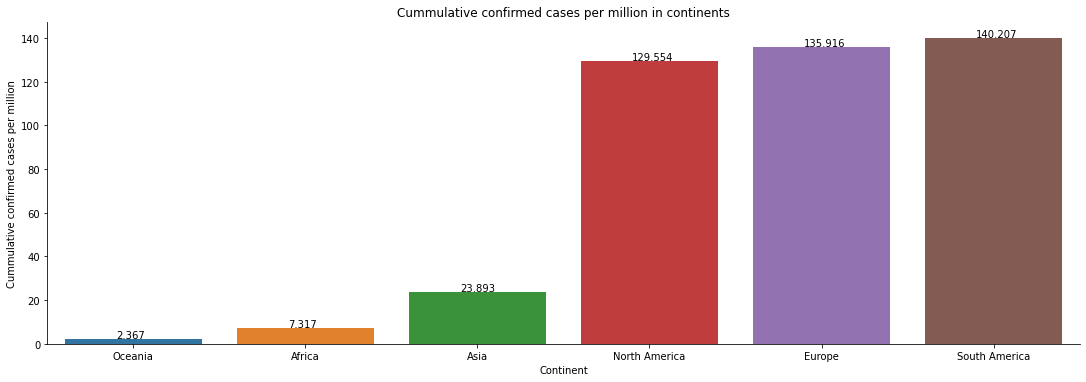

In [147]:
continent(continent_df,"total_cases_per_million",ylabel = "Cummulative confirmed cases per million",
          title= "Cummulative confirmed cases per million in continents")

South America, Eroupe and North America has highest cummulative cases per million.

# 2. Cummulative deaths per million

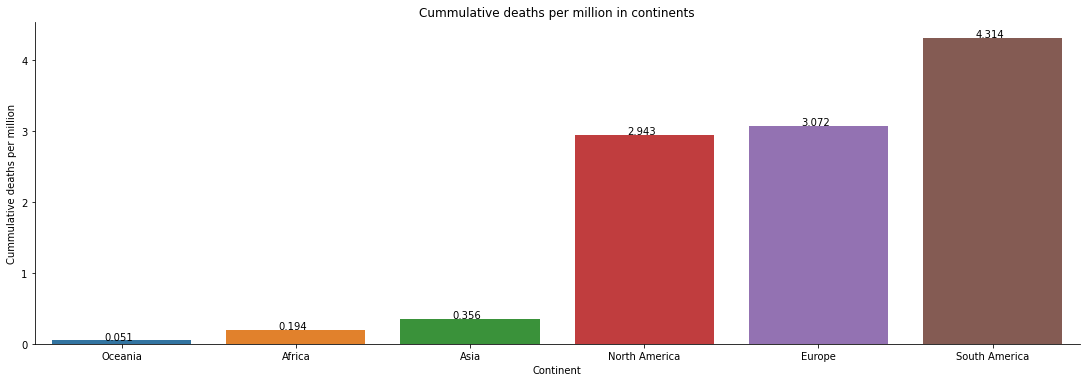

In [148]:
continent(continent_df,"total_deaths_per_million",ylabel = "Cummulative deaths per million",
          title= "Cummulative deaths per million in continents")

South America, Eroupe and North America has highest Cummulative deaths per million.

# 3. Deaths to confirmed cases ratio

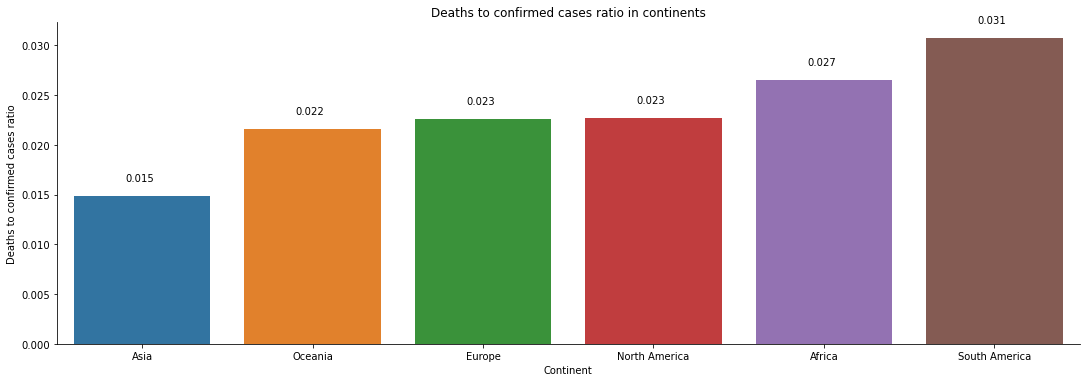

In [149]:
continent(continent_df,"Deaths_to_confirmed_ratio",ylabel = "Deaths to confirmed cases ratio",
          title= "Deaths to confirmed cases ratio in continents")

South America, Africa has highest Cummulative deaths per million.

In [ ]:
1 - Even Africa has lower cases per million and deaths per million but has the second highest deaths to confirmed ratio. This can reflect the heath care system of Africa.

2- South America is the most suffering continent with highest cummulative cases, deaths and deaths to confirmed ratio.

3- Europe and North America reflect better heath care systems comparing their death to confirmed ratios with their very high cases per million.

# Observations

1 - we can see that even Africa has lower cases per million and deaths per million but has the second highest deaths to confirmed ratio. This can reflect the heath care of Africa.

2- South America is the most suffering continent with highest cummulative cases, deaths and deaths to confirmed ratio.

3- Europe and North America reflect better heath care systems comparing their death to confirmed ratios and observing their very high cases per million

<a id='research7'></a>

# What is the effect of Vaccinations on daily cases?


# We found that
FOr US and Uk we can notice a high decrease in daily cases from the start of vaccination.

In [134]:
# Create a function that take the timeseries dataframe and country name then return a plot that combine
# daily confirmed cases and daily full vaccinated cases to show the effect of vaccination on daily new cases.

def vaccination(timeseries_df,country):
    fig, ax = plt.subplots(figsize=(15,8))
    country_df = timeseries_df[timeseries_df["country"] == country].copy()
    country_df["daily_full_vaccinated_per_million"] = country_df["daily_full_vaccinated_per_million"].rolling(7).mean()
    country_df["daily_cases_per_million"] = country_df["daily_cases_per_million"].rolling(7).mean()
    sns.lineplot(x = 'date', y = 'daily_cases_per_million',data = country_df,ax=ax)
    sns.lineplot(x = 'date', y = 'daily_full_vaccinated_per_million',data = country_df,ax=ax)
    plt.legend(["Daily confirmed cases per million","Daily full vaccinated per million"]);
    plt.ylabel("Daily cases per million")
    plt.xlabel("Date")
    plt.title("Effect of vaccination on  {} cases".format(country));

## United Kingdom

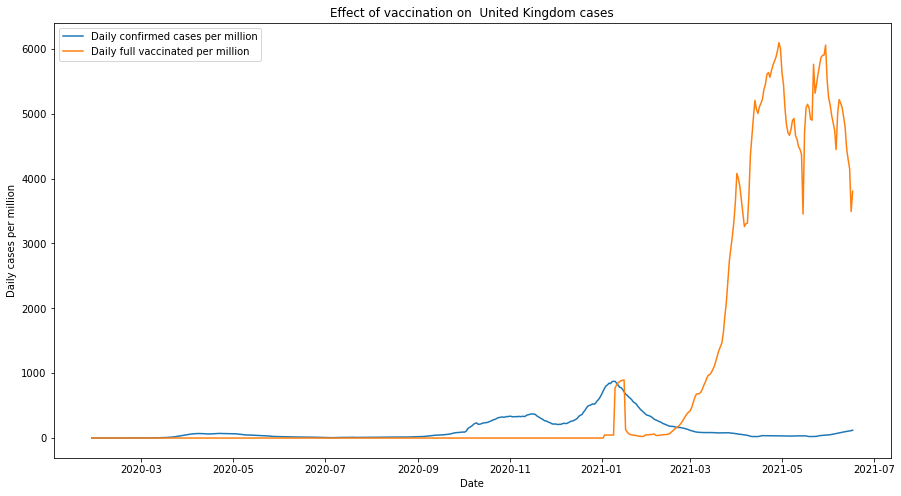

In [135]:
vaccination(timeseries_df,"United Kingdom")

# United States

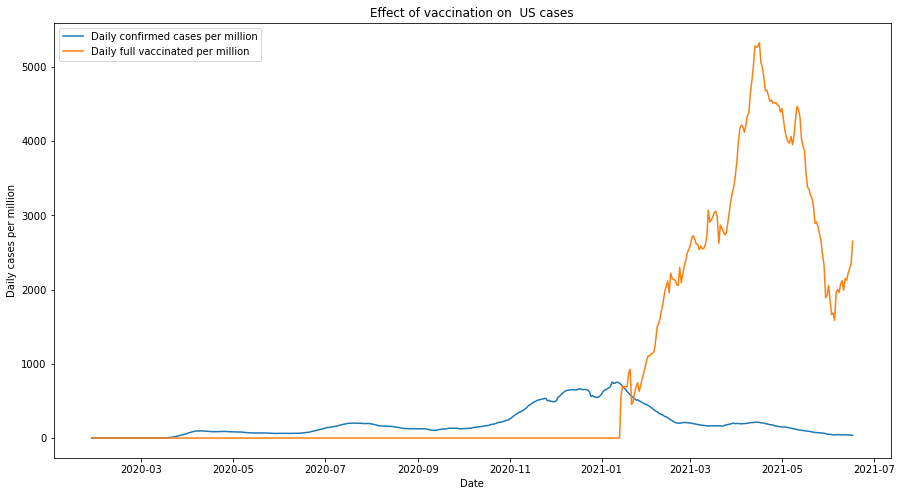

In [136]:
vaccination(timeseries_df,"US")

## Observation

We don't need to fall into the faulty of generalization. So,for US and Uk we can notice a high decrease in daily cases from the start of vaccination.

# Conclusions

## Timeseries Analysis

1- It is clear that the occurrence time of waves and their strength are greatly different from one country to another. We definitly can't identify a pattern that all countries follow either in wave strength or time of occurrence. we can only find few details that some countries share.


2- Worldwide data may be misleading if it took alone as different countries has very different conditions.So, we can't generalize any insights from it.


3- The strength of waves worldwide is continously incrasing but in Egypt,US and Italy the third wave is lower than the second one. This can explain point 2.


4- Egypt, United Kingdom and US shares a wave in months [Dec,Jan,Feb].


5- Egypt and Italy share a repetitive pattern of covid waves that starts between Feb and March. It happened in 2020 and also in 2021.


6- United Kingdom and India don't have  repeatitive patterns in waves till now.


## Effect of Test rates on daily cases

7- There is a wide gap of test rates between countries.


8- High test rates result in increase in daily cases per million ratio. This High test rates will be the more likeliy to represent the actual case.  

## Effect of Population density on daily cases

9- For low test rates it seems to have no effect.

10 - For high test rates we can see an increase in average daily cases per million for high population density.

## Effect of  median age on daily cases

11- For both low test rates and high test rates we can see an increase in average daily cases per million for high  median age counties but it is more clear for high test rates.


12- Countries with high Median age has higher averager deaths under all conditions.

13- Countries with low Median age have about the same deaths per million ratio for both population density level.


14-  For Countries with high Median we can see that deaths per million are inversly proportional to population density for both test rates.



## Effect of Income level on daily cases

15- Under all conditions, we can see the higher the income the higher the cases per million.

## Effect of continent on daily cases

16- we can see that even Africa has lower cases per million and deaths per million but has the second highest deaths to confirmed ratio. This can reflect quality of the heath care system of Africa.

17- South America is the most suffering continent.

18- Europe and North America reflect better heath care systems with their low death to confirmed ratios compared to their very high cases per million.

## Effect of vaccination on daily cases

19 - for US and Uk we can notice a high decrease in daily cases from the start of vaccination.


<a id='recomend'></a>
# Recommendations

1- Countries with repeatitive wave patterns should make great use of this. They should take proactive moves designing their future strategies about food imports,medcine, etc.. taking into consideration the reasonable likelihood of being hit by a wave on the next pattern.

2- Study should be conducted to relate why high income countries has the highest cases per million, is that have any relation with the food happits, daily routine?

In [ ]:
jupyter nbconvert slideshow.ipynb --to slides --post serve --template output-toggle.tpl
